## **Problem 1**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls

gdrive	sample_data


In [ ]:
cd gdrive/MyDrive/UNCC/Spring22/Real-Time\ Machine\ Learning

/content/gdrive/MyDrive/UNCC/Spring22/Real-Time Machine Learning


In [ ]:
cd Homeworks/Homework\ 2

/content/gdrive/MyDrive/UNCC/Spring22/Real-Time Machine Learning/Homeworks/Homework 2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from collections import OrderedDict
import torch.optim as optim
torch.manual_seed(999)

In [ ]:
housing = pd.DataFrame(pd.read_csv("data/Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
#num_vars = ['area', 'bedrooms', 'bathrooms', 'stories','price']
data = housing[num_vars]
data.head()

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [ ]:
target_column = 'price'  # Target to predict
inputs = data.drop([target_column], axis=1).to_numpy()  
targets = data[[target_column]].to_numpy()                                 
inputs.shape, targets.shape

((545, 5), (545, 1))

In [ ]:
def normalize_data(x):
    x = (x - np.mean(x))/ (np.max(x) - np.min(x))
    return x

In [ ]:
X= normalize_data(inputs)
X = torch.from_numpy(X)
X = X.float()
y= normalize_data(targets)
y = torch.from_numpy(y)
y = y.float()


n_samples = X.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]


X_train = X[train_indices]
y_train = y[train_indices]

X_val = X[val_indices]
y_val = y[val_indices]

In [ ]:
import time
def loss_fn(y_p, y):
    squared_diffs = (y_p - y)**2
    return squared_diffs.mean()

def training_loop(n_epochs, optimizer, model, loss_fn, X_t, X_v,
                  y_t, y_v):
    training_start_time = time.time()
    dur=[]
    t_loss_list=[]
    v_loss_list=[]
    for epoch in range(1, n_epochs + 1):
        t0 = time.time()

        y_p_t = model(X_t) # <1>
        loss_train = loss_fn(y_p_t, y_t)
        t_loss_list.append(loss_train.item())

        y_p_v = model(X_v) # <1>
        loss_val = loss_fn(y_p_v, y_v)
        v_loss_list.append(loss_val.item())

        dur.append(time.time() - t0)

        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 20 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}, Time {np.mean(dur)}")
    print('Training finished, total time took {:.2f}s'.format(time.time() - training_start_time))
    return [t_loss_list, v_loss_list]

In [ ]:
fc_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(5, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))
optimizer = optim.Adam(fc_model.parameters(), lr=1e-2, weight_decay=1e-5)

In [ ]:
test_1 = training_loop(
    n_epochs = 200, 
    optimizer = optimizer,
    model = fc_model,
    loss_fn = loss_fn,
    X_t = X_train,
    X_v = X_val, 
    y_t = y_train,
    y_v = y_val)

Epoch 1, Training loss 0.0536, Validation loss 0.0411, Time 0.05799245834350586
Epoch 20, Training loss 0.0245, Validation loss 0.0225, Time 0.0032377243041992188
Epoch 40, Training loss 0.0193, Validation loss 0.0212, Time 0.0017745018005371094
Epoch 60, Training loss 0.0177, Validation loss 0.0229, Time 0.0012913346290588379
Epoch 80, Training loss 0.0175, Validation loss 0.0235, Time 0.0010566502809524537
Epoch 100, Training loss 0.0175, Validation loss 0.0237, Time 0.0009097790718078613
Epoch 120, Training loss 0.0175, Validation loss 0.0234, Time 0.0008095741271972656
Epoch 140, Training loss 0.0175, Validation loss 0.0234, Time 0.0007402982030596052
Epoch 160, Training loss 0.0175, Validation loss 0.0234, Time 0.0006863385438919068
Epoch 180, Training loss 0.0175, Validation loss 0.0233, Time 0.0006450759039984809
Epoch 200, Training loss 0.0175, Validation loss 0.0233, Time 0.0006088066101074219
Training finished, total time took 0.32s


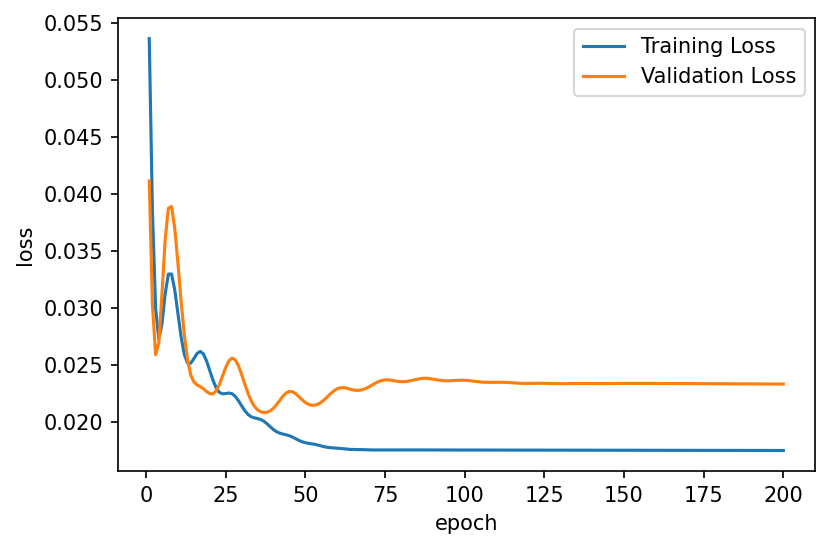

In [ ]:
from matplotlib import pyplot as plt

t_range = torch.arange(1, 201)

fig = plt.figure(dpi=150)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(t_range, test_1[0], label='Training Loss')
plt.plot(t_range, test_1[1], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
numel_list = [p.numel() for p in fc_model.parameters()]
sum(numel_list), numel_list

(57, [40, 8, 8, 1])

In [ ]:
fc_model = nn.Sequential(OrderedDict([
    ('hidden_linear_1', nn.Linear(5, 512)),
    ('hidden_activation_1', nn.Tanh()),
    ('hidden_linear_2', nn.Linear(512, 128)),
    ('hidden_activation_2', nn.Tanh()),
    ('hidden_linear_3', nn.Linear(128, 8)),
    ('hidden_activation_3', nn.Tanh()),
    

    ('output_linear', nn.Linear(8, 1))
]))
optimizer = optim.Adam(fc_model.parameters(), lr=1e-2, weight_decay=1e-5)

In [ ]:
test_b = training_loop(
    n_epochs = 200, 
    optimizer = optimizer,
    model = fc_model,
    loss_fn = nn.MSELoss(),
    X_t = X_train,
    X_v = X_val, 
    y_t = y_train,
    y_v = y_val)


Epoch 1, Training loss 0.1323, Validation loss 0.1557, Time 0.03583168983459473
Epoch 20, Training loss 0.0296, Validation loss 0.0335, Time 0.004795479774475098
Epoch 40, Training loss 0.0265, Validation loss 0.0271, Time 0.003951764106750489
Epoch 60, Training loss 0.0263, Validation loss 0.0263, Time 0.0036437074343363446
Epoch 80, Training loss 0.0263, Validation loss 0.0261, Time 0.003503122925758362
Epoch 100, Training loss 0.0263, Validation loss 0.0260, Time 0.0034280323982238767
Epoch 120, Training loss 0.0262, Validation loss 0.0259, Time 0.0034339547157287596
Epoch 140, Training loss 0.0261, Validation loss 0.0258, Time 0.0033494864191327776
Epoch 160, Training loss 0.0253, Validation loss 0.0255, Time 0.0033469095826148985
Epoch 180, Training loss 0.0188, Validation loss 0.0212, Time 0.003332499663035075
Epoch 200, Training loss 0.0164, Validation loss 0.0208, Time 0.0036837172508239744
Training finished, total time took 1.54s


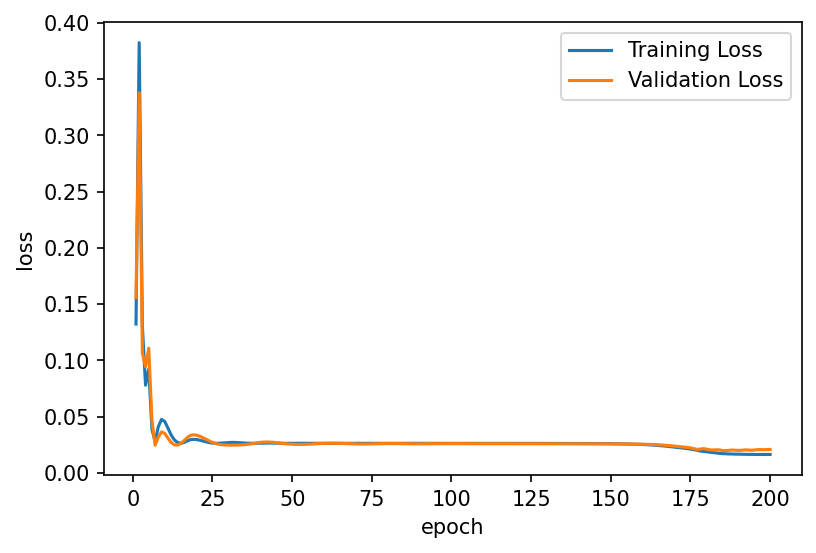

In [ ]:
t_range = torch.arange(1, 201)

fig = plt.figure(dpi=150)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(t_range, test_b[0], label='Training Loss')
plt.plot(t_range, test_b[1], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
numel_list = [p.numel() for p in fc_model.parameters()]
sum(numel_list), numel_list

(69777, [2560, 512, 65536, 128, 1024, 8, 8, 1])

## Problem 2

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls

gdrive	sample_data


In [3]:
!ls

gdrive	sample_data


In [4]:
cd gdrive/MyDrive/UNCC/Spring22/Real-Time\ Machine\ Learning

/content/gdrive/MyDrive/UNCC/Spring22/Real-Time Machine Learning


In [5]:
cd Homeworks/Homework\ 2

/content/gdrive/MyDrive/UNCC/Spring22/Real-Time Machine Learning/Homeworks/Homework 2


In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch
from tqdm import tqdm

import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import time

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [7]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

data_path = 'data/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))


cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64,
                                         shuffle=False)

dataloaders = {'train': train_loader, 
               'val': val_loader}


Files already downloaded and verified
Files already downloaded and verified


In [10]:
def training_loop(n_epochs, optimizer, model, loss_fn, dataloader, device):
    training_start_time = time.time()
    dur=[]
    

    train_accuracy_list=[]
    train_loss_list=[]
    val_accuracy_list=[]
    val_loss_list=[]
    best_acc=0
    best_epoch =0

    for epoch in range(1, n_epochs + 1):
        
        print('Epoch {}/{}'.format(epoch, n_epochs))
        print('-' * 10)
        for phase in ['train', 'val']:            
            t0 = time.time()

            correct = 0
            total = 0

            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0


            for i, data in enumerate(tqdm(dataloaders[phase])):
                
                imgs, labels = data
                imgs = imgs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                #with torch.set_grad_enabled(phase == 'train'):
                
                out = model(imgs.view(imgs.shape[0], -1))
                #loss = loss_fn(out, torch.tensor([labels]))
                loss = loss_fn(out, labels.long())
                _, predicted = torch.max(out, dim=1)

                total += labels.shape[0]
                correct += int((predicted == labels).sum())

                if phase == 'train':
                    loss.backward()
                    optimizer.step()
                
                

                running_loss += float(loss)
                running_corrects += torch.sum(predicted == labels)
            t1= time.time() - t0
            dur.append(t1)
            epoch_loss = running_loss / len(dataloaders[phase].dataset) 
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)
            accuracy = (correct / total)

            if phase == 'val':
                
                val_accuracy_list.append(accuracy)
                val_loss_list.append(loss)
                dur.append(time.time() - t0)

            if phase == 'train':            

                train_accuracy_list.append(accuracy)
                train_loss_list.append(loss)  


            if phase == 'val' and accuracy > best_acc:
                best_acc = accuracy
                best_epoch = epoch

            #epoch_time= np.mean(dur)   
            #if n_epochs == 1 or n_epochs % 20 == 0: 
            print('{} Loss: {:.4f} Acc: {:.4f} Time: {}'.format(phase, loss,
                                                    accuracy, t1))
      
    print('Training finished, total training time {:.2f}s'.format(time.time() - training_start_time))
    print("Best Validation Accuracy: {:.4f} ".format(best_acc))
    print("Best Validation Accuracy achieved at Epoch: {} ".format(best_epoch))
    return [train_accuracy_list, train_loss_list, val_accuracy_list, val_loss_list]

In [ ]:
fc_model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 10),
            #nn.LogSoftmax(dim=1)
            )


In [ ]:
print(torch.cuda.is_available())
#print(device)

True


In [ ]:
if torch.cuda.device_count() >= 1:
    fc_model = torch.nn.DataParallel(fc_model)
    device = torch.device("cuda")
    fc_model.to(device)
else:
    device='cpu'

learning_rate = 1e-2
optimizer = optim.SGD(fc_model.parameters(), lr=learning_rate)
#loss_fn = nn.NLLLoss()
loss_fn = nn.CrossEntropyLoss()
n_epochs = 200

In [ ]:
test_2a = training_loop(
    n_epochs = 200, 
    optimizer = optimizer,
    model = fc_model,
    loss_fn = loss_fn,   
    dataloader = dataloaders,
    device = device,)


Epoch 1/200
----------


100%|██████████| 782/782 [00:18<00:00, 43.20it/s]


train Loss: 2.3403 Acc: 0.3718 Time: 18.11711049079895


100%|██████████| 157/157 [00:04<00:00, 36.14it/s]


val Loss: 1.8104 Acc: 0.3941 Time: 4.362142562866211
Epoch 2/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.51it/s]


train Loss: 2.2265 Acc: 0.4179 Time: 15.19350552558899


100%|██████████| 157/157 [00:02<00:00, 55.16it/s]


val Loss: 1.7606 Acc: 0.4157 Time: 2.8535819053649902
Epoch 3/200
----------


100%|██████████| 782/782 [00:15<00:00, 50.79it/s]


train Loss: 2.1251 Acc: 0.4379 Time: 15.406028509140015


100%|██████████| 157/157 [00:02<00:00, 55.19it/s]


val Loss: 1.7328 Acc: 0.4253 Time: 2.8560221195220947
Epoch 4/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.63it/s]


train Loss: 2.0265 Acc: 0.4560 Time: 14.869686603546143


100%|██████████| 157/157 [00:02<00:00, 56.04it/s]


val Loss: 1.7145 Acc: 0.4341 Time: 2.808870792388916
Epoch 5/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.70it/s]


train Loss: 1.9287 Acc: 0.4722 Time: 14.850121974945068


100%|██████████| 157/157 [00:02<00:00, 55.90it/s]


val Loss: 1.7036 Acc: 0.4423 Time: 2.8193869590759277
Epoch 6/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.70it/s]


train Loss: 1.8293 Acc: 0.4876 Time: 14.847167491912842


100%|██████████| 157/157 [00:02<00:00, 55.78it/s]


val Loss: 1.7004 Acc: 0.4468 Time: 2.8254919052124023
Epoch 7/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.33it/s]


train Loss: 1.7277 Acc: 0.5012 Time: 14.963132619857788


100%|██████████| 157/157 [00:03<00:00, 47.36it/s]


val Loss: 1.7028 Acc: 0.4504 Time: 3.326072931289673
Epoch 8/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.11it/s]


train Loss: 1.6248 Acc: 0.5144 Time: 15.315585374832153


100%|██████████| 157/157 [00:02<00:00, 55.74it/s]


val Loss: 1.7075 Acc: 0.4557 Time: 2.8246750831604004
Epoch 9/200
----------


100%|██████████| 782/782 [00:15<00:00, 52.10it/s]


train Loss: 1.5208 Acc: 0.5279 Time: 15.01542329788208


100%|██████████| 157/157 [00:02<00:00, 55.48it/s]


val Loss: 1.7134 Acc: 0.4613 Time: 2.8392574787139893
Epoch 10/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.28it/s]


train Loss: 1.4154 Acc: 0.5407 Time: 14.973672866821289


100%|██████████| 157/157 [00:02<00:00, 54.80it/s]


val Loss: 1.7200 Acc: 0.4657 Time: 2.872546434402466
Epoch 11/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.55it/s]


train Loss: 1.3102 Acc: 0.5535 Time: 14.897077798843384


100%|██████████| 157/157 [00:02<00:00, 55.28it/s]


val Loss: 1.7256 Acc: 0.4712 Time: 2.852710723876953
Epoch 12/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.25it/s]


train Loss: 1.2084 Acc: 0.5666 Time: 14.975903511047363


100%|██████████| 157/157 [00:02<00:00, 55.49it/s]


val Loss: 1.7287 Acc: 0.4766 Time: 2.8462212085723877
Epoch 13/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.57it/s]


train Loss: 1.1130 Acc: 0.5788 Time: 14.885640859603882


100%|██████████| 157/157 [00:02<00:00, 55.67it/s]


val Loss: 1.7290 Acc: 0.4787 Time: 2.8308794498443604
Epoch 14/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.62it/s]


train Loss: 1.0245 Acc: 0.5911 Time: 15.155452013015747


100%|██████████| 157/157 [00:02<00:00, 54.59it/s]


val Loss: 1.7271 Acc: 0.4820 Time: 2.8911895751953125
Epoch 15/200
----------


100%|██████████| 782/782 [00:15<00:00, 52.09it/s]


train Loss: 0.9430 Acc: 0.6035 Time: 15.022217273712158


100%|██████████| 157/157 [00:02<00:00, 55.74it/s]


val Loss: 1.7247 Acc: 0.4860 Time: 2.8283119201660156
Epoch 16/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.23it/s]


train Loss: 0.8681 Acc: 0.6167 Time: 14.980042695999146


100%|██████████| 157/157 [00:02<00:00, 55.45it/s]


val Loss: 1.7230 Acc: 0.4882 Time: 2.838339328765869
Epoch 17/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.72it/s]


train Loss: 0.7994 Acc: 0.6296 Time: 14.843806266784668


100%|██████████| 157/157 [00:02<00:00, 55.31it/s]


val Loss: 1.7226 Acc: 0.4900 Time: 2.8460240364074707
Epoch 18/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.91it/s]


train Loss: 0.7363 Acc: 0.6412 Time: 14.791692018508911


100%|██████████| 157/157 [00:02<00:00, 56.89it/s]


val Loss: 1.7238 Acc: 0.4939 Time: 2.772061824798584
Epoch 19/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.85it/s]


train Loss: 0.6783 Acc: 0.6543 Time: 14.804622650146484


100%|██████████| 157/157 [00:02<00:00, 55.28it/s]


val Loss: 1.7266 Acc: 0.4947 Time: 2.854414463043213
Epoch 20/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.97it/s]


train Loss: 0.6251 Acc: 0.6673 Time: 14.773258686065674


100%|██████████| 157/157 [00:02<00:00, 56.12it/s]


val Loss: 1.7314 Acc: 0.4949 Time: 2.807384729385376
Epoch 21/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.45it/s]


train Loss: 0.5762 Acc: 0.6811 Time: 15.205153942108154


100%|██████████| 157/157 [00:02<00:00, 55.75it/s]


val Loss: 1.7385 Acc: 0.4946 Time: 2.826111316680908
Epoch 22/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.90it/s]


train Loss: 0.5311 Acc: 0.6937 Time: 14.801995515823364


100%|██████████| 157/157 [00:02<00:00, 55.08it/s]


val Loss: 1.7482 Acc: 0.4938 Time: 2.8581955432891846
Epoch 23/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.23it/s]


train Loss: 0.4893 Acc: 0.7071 Time: 14.97895884513855


100%|██████████| 157/157 [00:02<00:00, 54.32it/s]


val Loss: 1.7600 Acc: 0.4921 Time: 2.900484085083008
Epoch 24/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.80it/s]


train Loss: 0.4506 Acc: 0.7198 Time: 14.817410230636597


100%|██████████| 157/157 [00:02<00:00, 56.01it/s]


val Loss: 1.7734 Acc: 0.4910 Time: 2.8181140422821045
Epoch 25/200
----------


100%|██████████| 782/782 [00:15<00:00, 52.01it/s]


train Loss: 0.4146 Acc: 0.7312 Time: 15.047116756439209


100%|██████████| 157/157 [00:02<00:00, 53.56it/s]


val Loss: 1.7882 Acc: 0.4915 Time: 2.940218687057495
Epoch 26/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.17it/s]


train Loss: 0.3810 Acc: 0.7434 Time: 15.00396180152893


100%|██████████| 157/157 [00:02<00:00, 54.93it/s]


val Loss: 1.8039 Acc: 0.4910 Time: 2.870744228363037
Epoch 27/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.57it/s]


train Loss: 0.3496 Acc: 0.7559 Time: 14.881879329681396


100%|██████████| 157/157 [00:02<00:00, 54.60it/s]


val Loss: 1.8205 Acc: 0.4907 Time: 2.8856618404388428
Epoch 28/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.55it/s]


train Loss: 0.3203 Acc: 0.7684 Time: 14.889707803726196


100%|██████████| 157/157 [00:02<00:00, 56.12it/s]


val Loss: 1.8380 Acc: 0.4898 Time: 2.812431812286377
Epoch 29/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.56it/s]


train Loss: 0.2930 Acc: 0.7805 Time: 14.8882155418396


100%|██████████| 157/157 [00:02<00:00, 55.12it/s]


val Loss: 1.8562 Acc: 0.4893 Time: 2.8705296516418457
Epoch 30/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.42it/s]


train Loss: 0.2676 Acc: 0.7909 Time: 14.923866748809814


100%|██████████| 157/157 [00:02<00:00, 56.27it/s]


val Loss: 1.8754 Acc: 0.4880 Time: 2.8014299869537354
Epoch 31/200
----------


100%|██████████| 782/782 [00:15<00:00, 52.10it/s]


train Loss: 0.2442 Acc: 0.8024 Time: 15.026987791061401


100%|██████████| 157/157 [00:02<00:00, 54.76it/s]


val Loss: 1.8955 Acc: 0.4877 Time: 2.879789352416992
Epoch 32/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.74it/s]


train Loss: 0.2228 Acc: 0.8138 Time: 14.835751295089722


100%|██████████| 157/157 [00:02<00:00, 56.65it/s]


val Loss: 1.9167 Acc: 0.4869 Time: 2.7857632637023926
Epoch 33/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.52it/s]


train Loss: 0.2033 Acc: 0.8246 Time: 14.904369354248047


100%|██████████| 157/157 [00:02<00:00, 57.10it/s]


val Loss: 1.9392 Acc: 0.4862 Time: 2.76560378074646
Epoch 34/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.72it/s]


train Loss: 0.1859 Acc: 0.8346 Time: 14.847199440002441


100%|██████████| 157/157 [00:02<00:00, 55.16it/s]


val Loss: 1.9629 Acc: 0.4847 Time: 2.8531713485717773
Epoch 35/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.65it/s]


train Loss: 0.1702 Acc: 0.8440 Time: 14.868621587753296


100%|██████████| 157/157 [00:02<00:00, 55.58it/s]


val Loss: 1.9882 Acc: 0.4835 Time: 2.831782341003418
Epoch 36/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.91it/s]


train Loss: 0.1563 Acc: 0.8536 Time: 14.790025234222412


100%|██████████| 157/157 [00:02<00:00, 54.86it/s]


val Loss: 2.0150 Acc: 0.4832 Time: 2.870819330215454
Epoch 37/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.72it/s]


train Loss: 0.1439 Acc: 0.8635 Time: 14.840718507766724


100%|██████████| 157/157 [00:02<00:00, 54.05it/s]


val Loss: 2.0434 Acc: 0.4836 Time: 2.9139769077301025
Epoch 38/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.98it/s]


train Loss: 0.1328 Acc: 0.8725 Time: 14.777556419372559


100%|██████████| 157/157 [00:02<00:00, 55.54it/s]


val Loss: 2.0735 Acc: 0.4836 Time: 2.83427357673645
Epoch 39/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.41it/s]


train Loss: 0.1230 Acc: 0.8805 Time: 15.220227479934692


100%|██████████| 157/157 [00:02<00:00, 56.04it/s]


val Loss: 2.1052 Acc: 0.4828 Time: 2.8154568672180176
Epoch 40/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.44it/s]


train Loss: 0.1142 Acc: 0.8882 Time: 14.923125505447388


100%|██████████| 157/157 [00:02<00:00, 54.16it/s]


val Loss: 2.1383 Acc: 0.4804 Time: 2.9158754348754883
Epoch 41/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.67it/s]


train Loss: 0.1062 Acc: 0.8962 Time: 14.860427618026733


100%|██████████| 157/157 [00:02<00:00, 56.13it/s]


val Loss: 2.1727 Acc: 0.4797 Time: 2.80802845954895
Epoch 42/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.62it/s]


train Loss: 0.0990 Acc: 0.9040 Time: 14.868193626403809


100%|██████████| 157/157 [00:02<00:00, 55.34it/s]


val Loss: 2.2081 Acc: 0.4789 Time: 2.849794864654541
Epoch 43/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.82it/s]


train Loss: 0.0925 Acc: 0.9108 Time: 14.812968254089355


100%|██████████| 157/157 [00:02<00:00, 56.41it/s]


val Loss: 2.2442 Acc: 0.4791 Time: 2.793733835220337
Epoch 44/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.69it/s]


train Loss: 0.0866 Acc: 0.9182 Time: 14.851401805877686


100%|██████████| 157/157 [00:02<00:00, 55.61it/s]


val Loss: 2.2806 Acc: 0.4777 Time: 2.831587076187134
Epoch 45/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.17it/s]


train Loss: 0.0811 Acc: 0.9244 Time: 15.000900983810425


100%|██████████| 157/157 [00:02<00:00, 55.07it/s]


val Loss: 2.3170 Acc: 0.4774 Time: 2.8664305210113525
Epoch 46/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.99it/s]


train Loss: 0.0761 Acc: 0.9302 Time: 15.051721811294556


100%|██████████| 157/157 [00:02<00:00, 54.63it/s]


val Loss: 2.3529 Acc: 0.4768 Time: 2.889549493789673
Epoch 47/200
----------


100%|██████████| 782/782 [00:15<00:00, 52.10it/s]


train Loss: 0.0715 Acc: 0.9361 Time: 15.023874044418335


100%|██████████| 157/157 [00:02<00:00, 56.06it/s]


val Loss: 2.3881 Acc: 0.4754 Time: 2.81378436088562
Epoch 48/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.35it/s]


train Loss: 0.0672 Acc: 0.9408 Time: 14.951415777206421


100%|██████████| 157/157 [00:02<00:00, 54.37it/s]


val Loss: 2.4222 Acc: 0.4742 Time: 2.89715313911438
Epoch 49/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.69it/s]


train Loss: 0.0633 Acc: 0.9457 Time: 15.135064601898193


100%|██████████| 157/157 [00:02<00:00, 54.44it/s]


val Loss: 2.4549 Acc: 0.4728 Time: 2.897345542907715
Epoch 50/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.95it/s]


train Loss: 0.0596 Acc: 0.9498 Time: 15.068320751190186


100%|██████████| 157/157 [00:02<00:00, 55.73it/s]


val Loss: 2.4859 Acc: 0.4731 Time: 2.8257369995117188
Epoch 51/200
----------


100%|██████████| 782/782 [00:15<00:00, 52.00it/s]


train Loss: 0.0562 Acc: 0.9543 Time: 15.052847623825073


100%|██████████| 157/157 [00:02<00:00, 55.10it/s]


val Loss: 2.5149 Acc: 0.4727 Time: 2.8663642406463623
Epoch 52/200
----------


100%|██████████| 782/782 [00:15<00:00, 52.11it/s]


train Loss: 0.0530 Acc: 0.9582 Time: 15.013113975524902


100%|██████████| 157/157 [00:02<00:00, 54.80it/s]


val Loss: 2.5418 Acc: 0.4738 Time: 2.8756377696990967
Epoch 53/200
----------


100%|██████████| 782/782 [00:15<00:00, 52.10it/s]


train Loss: 0.0500 Acc: 0.9620 Time: 15.025436162948608


100%|██████████| 157/157 [00:02<00:00, 54.98it/s]


val Loss: 2.5666 Acc: 0.4737 Time: 2.8698625564575195
Epoch 54/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.83it/s]


train Loss: 0.0472 Acc: 0.9653 Time: 15.097054481506348


100%|██████████| 157/157 [00:02<00:00, 55.50it/s]


val Loss: 2.5890 Acc: 0.4734 Time: 2.8387794494628906
Epoch 55/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.15it/s]


train Loss: 0.0446 Acc: 0.9682 Time: 15.006697654724121


100%|██████████| 157/157 [00:02<00:00, 55.52it/s]


val Loss: 2.6093 Acc: 0.4723 Time: 2.843963861465454
Epoch 56/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.73it/s]


train Loss: 0.0421 Acc: 0.9713 Time: 15.126363754272461


100%|██████████| 157/157 [00:02<00:00, 54.26it/s]


val Loss: 2.6275 Acc: 0.4725 Time: 2.903830051422119
Epoch 57/200
----------


100%|██████████| 782/782 [00:15<00:00, 50.67it/s]


train Loss: 0.0398 Acc: 0.9738 Time: 15.448760032653809


100%|██████████| 157/157 [00:02<00:00, 55.54it/s]


val Loss: 2.6437 Acc: 0.4726 Time: 2.842777729034424
Epoch 58/200
----------


100%|██████████| 782/782 [00:15<00:00, 52.01it/s]


train Loss: 0.0376 Acc: 0.9761 Time: 15.04324221611023


100%|██████████| 157/157 [00:02<00:00, 55.83it/s]


val Loss: 2.6582 Acc: 0.4721 Time: 2.827366828918457
Epoch 59/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.92it/s]


train Loss: 0.0356 Acc: 0.9780 Time: 15.072429180145264


100%|██████████| 157/157 [00:02<00:00, 53.46it/s]


val Loss: 2.6712 Acc: 0.4722 Time: 2.9470949172973633
Epoch 60/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.77it/s]


train Loss: 0.0337 Acc: 0.9804 Time: 15.113988399505615


100%|██████████| 157/157 [00:03<00:00, 52.08it/s]


val Loss: 2.6828 Acc: 0.4718 Time: 3.0274651050567627
Epoch 61/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.17it/s]


train Loss: 0.0319 Acc: 0.9823 Time: 15.295188188552856


100%|██████████| 157/157 [00:02<00:00, 54.78it/s]


val Loss: 2.6933 Acc: 0.4709 Time: 2.8839125633239746
Epoch 62/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.17it/s]


train Loss: 0.0302 Acc: 0.9840 Time: 15.290543794631958


100%|██████████| 157/157 [00:02<00:00, 54.09it/s]


val Loss: 2.7029 Acc: 0.4712 Time: 2.9142019748687744
Epoch 63/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.21it/s]


train Loss: 0.0287 Acc: 0.9856 Time: 15.28174638748169


100%|██████████| 157/157 [00:02<00:00, 53.75it/s]


val Loss: 2.7117 Acc: 0.4715 Time: 2.9377894401550293
Epoch 64/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.85it/s]


train Loss: 0.0272 Acc: 0.9869 Time: 15.095769166946411


100%|██████████| 157/157 [00:02<00:00, 53.93it/s]


val Loss: 2.7199 Acc: 0.4706 Time: 2.91888165473938
Epoch 65/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.49it/s]


train Loss: 0.0258 Acc: 0.9883 Time: 14.910157203674316


100%|██████████| 157/157 [00:02<00:00, 55.31it/s]


val Loss: 2.7277 Acc: 0.4696 Time: 2.8538143634796143
Epoch 66/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.77it/s]


train Loss: 0.0246 Acc: 0.9891 Time: 15.113038063049316


100%|██████████| 157/157 [00:02<00:00, 53.84it/s]


val Loss: 2.7351 Acc: 0.4690 Time: 2.9283835887908936
Epoch 67/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.63it/s]


train Loss: 0.0234 Acc: 0.9900 Time: 14.86392068862915


100%|██████████| 157/157 [00:02<00:00, 54.76it/s]


val Loss: 2.7423 Acc: 0.4680 Time: 2.8767430782318115
Epoch 68/200
----------


100%|██████████| 782/782 [00:15<00:00, 52.02it/s]


train Loss: 0.0223 Acc: 0.9909 Time: 15.045932531356812


100%|██████████| 157/157 [00:02<00:00, 54.75it/s]


val Loss: 2.7493 Acc: 0.4678 Time: 2.8826475143432617
Epoch 69/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.31it/s]


train Loss: 0.0212 Acc: 0.9915 Time: 14.95818018913269


100%|██████████| 157/157 [00:02<00:00, 55.09it/s]


val Loss: 2.7562 Acc: 0.4683 Time: 2.8611011505126953
Epoch 70/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.58it/s]


train Loss: 0.0202 Acc: 0.9922 Time: 15.172738075256348


100%|██████████| 157/157 [00:02<00:00, 55.17it/s]


val Loss: 2.7630 Acc: 0.4678 Time: 2.85825777053833
Epoch 71/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.99it/s]


train Loss: 0.0193 Acc: 0.9930 Time: 15.054445505142212


100%|██████████| 157/157 [00:02<00:00, 54.64it/s]


val Loss: 2.7698 Acc: 0.4678 Time: 2.8827850818634033
Epoch 72/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.47it/s]


train Loss: 0.0185 Acc: 0.9934 Time: 14.914519548416138


100%|██████████| 157/157 [00:02<00:00, 54.59it/s]


val Loss: 2.7766 Acc: 0.4684 Time: 2.8878438472747803
Epoch 73/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.68it/s]


train Loss: 0.0176 Acc: 0.9941 Time: 15.137531280517578


100%|██████████| 157/157 [00:02<00:00, 53.28it/s]


val Loss: 2.7834 Acc: 0.4686 Time: 2.9587130546569824
Epoch 74/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.51it/s]


train Loss: 0.0169 Acc: 0.9945 Time: 15.19229793548584


100%|██████████| 157/157 [00:02<00:00, 53.25it/s]


val Loss: 2.7903 Acc: 0.4686 Time: 2.9657506942749023
Epoch 75/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.45it/s]


train Loss: 0.0162 Acc: 0.9950 Time: 15.20737361907959


100%|██████████| 157/157 [00:02<00:00, 54.95it/s]


val Loss: 2.7974 Acc: 0.4683 Time: 2.8716585636138916
Epoch 76/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.61it/s]


train Loss: 0.0155 Acc: 0.9955 Time: 15.160857677459717


100%|██████████| 157/157 [00:02<00:00, 54.71it/s]


val Loss: 2.8045 Acc: 0.4677 Time: 2.8778817653656006
Epoch 77/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.63it/s]


train Loss: 0.0149 Acc: 0.9958 Time: 15.151843309402466


100%|██████████| 157/157 [00:02<00:00, 54.19it/s]


val Loss: 2.8118 Acc: 0.4681 Time: 2.917405366897583
Epoch 78/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.56it/s]


train Loss: 0.0143 Acc: 0.9960 Time: 15.180606603622437


100%|██████████| 157/157 [00:02<00:00, 54.28it/s]


val Loss: 2.8192 Acc: 0.4667 Time: 2.9005818367004395
Epoch 79/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.52it/s]


train Loss: 0.0137 Acc: 0.9963 Time: 15.185498714447021


100%|██████████| 157/157 [00:02<00:00, 54.16it/s]


val Loss: 2.8267 Acc: 0.4668 Time: 2.910675048828125
Epoch 80/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.66it/s]


train Loss: 0.0132 Acc: 0.9966 Time: 15.143512964248657


100%|██████████| 157/157 [00:02<00:00, 55.05it/s]


val Loss: 2.8344 Acc: 0.4669 Time: 2.8632924556732178
Epoch 81/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.75it/s]


train Loss: 0.0127 Acc: 0.9969 Time: 15.119647979736328


100%|██████████| 157/157 [00:02<00:00, 54.85it/s]


val Loss: 2.8422 Acc: 0.4672 Time: 2.870946168899536
Epoch 82/200
----------


100%|██████████| 782/782 [00:15<00:00, 52.00it/s]


train Loss: 0.0122 Acc: 0.9970 Time: 15.051952123641968


100%|██████████| 157/157 [00:02<00:00, 54.67it/s]


val Loss: 2.8501 Acc: 0.4667 Time: 2.879441976547241
Epoch 83/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.69it/s]


train Loss: 0.0118 Acc: 0.9973 Time: 15.137185335159302


100%|██████████| 157/157 [00:02<00:00, 54.44it/s]


val Loss: 2.8582 Acc: 0.4664 Time: 2.893939256668091
Epoch 84/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.71it/s]


train Loss: 0.0113 Acc: 0.9975 Time: 15.136114358901978


100%|██████████| 157/157 [00:02<00:00, 53.65it/s]


val Loss: 2.8663 Acc: 0.4664 Time: 2.937368392944336
Epoch 85/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.51it/s]


train Loss: 0.0109 Acc: 0.9976 Time: 15.190745115280151


100%|██████████| 157/157 [00:02<00:00, 55.20it/s]


val Loss: 2.8745 Acc: 0.4660 Time: 2.858046054840088
Epoch 86/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.92it/s]


train Loss: 0.0105 Acc: 0.9977 Time: 15.071517705917358


100%|██████████| 157/157 [00:02<00:00, 54.04it/s]


val Loss: 2.8829 Acc: 0.4658 Time: 2.913266181945801
Epoch 87/200
----------


100%|██████████| 782/782 [00:15<00:00, 52.05it/s]


train Loss: 0.0102 Acc: 0.9978 Time: 15.03170108795166


100%|██████████| 157/157 [00:02<00:00, 55.07it/s]


val Loss: 2.8913 Acc: 0.4654 Time: 2.8608624935150146
Epoch 88/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.50it/s]


train Loss: 0.0098 Acc: 0.9980 Time: 15.18931245803833


100%|██████████| 157/157 [00:02<00:00, 54.81it/s]


val Loss: 2.8998 Acc: 0.4654 Time: 2.875127077102661
Epoch 89/200
----------


100%|██████████| 782/782 [00:15<00:00, 52.01it/s]


train Loss: 0.0095 Acc: 0.9982 Time: 15.046303033828735


100%|██████████| 157/157 [00:02<00:00, 55.50it/s]


val Loss: 2.9084 Acc: 0.4657 Time: 2.835367202758789
Epoch 90/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.14it/s]


train Loss: 0.0092 Acc: 0.9983 Time: 15.01233720779419


100%|██████████| 157/157 [00:02<00:00, 55.52it/s]


val Loss: 2.9170 Acc: 0.4654 Time: 2.8432323932647705
Epoch 91/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.72it/s]


train Loss: 0.0089 Acc: 0.9984 Time: 14.84796142578125


100%|██████████| 157/157 [00:02<00:00, 55.71it/s]


val Loss: 2.9258 Acc: 0.4657 Time: 2.8325417041778564
Epoch 92/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.45it/s]


train Loss: 0.0086 Acc: 0.9985 Time: 15.214159727096558


100%|██████████| 157/157 [00:02<00:00, 55.81it/s]


val Loss: 2.9346 Acc: 0.4656 Time: 2.8265116214752197
Epoch 93/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.87it/s]


train Loss: 0.0083 Acc: 0.9986 Time: 14.804230690002441


100%|██████████| 157/157 [00:02<00:00, 56.65it/s]


val Loss: 2.9435 Acc: 0.4654 Time: 2.7800345420837402
Epoch 94/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.96it/s]


train Loss: 0.0081 Acc: 0.9987 Time: 15.058050394058228


100%|██████████| 157/157 [00:02<00:00, 56.04it/s]


val Loss: 2.9525 Acc: 0.4652 Time: 2.815053701400757
Epoch 95/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.89it/s]


train Loss: 0.0078 Acc: 0.9988 Time: 14.799463510513306


100%|██████████| 157/157 [00:02<00:00, 55.17it/s]


val Loss: 2.9615 Acc: 0.4652 Time: 2.8535542488098145
Epoch 96/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.58it/s]


train Loss: 0.0076 Acc: 0.9989 Time: 14.88193392753601


100%|██████████| 157/157 [00:02<00:00, 55.39it/s]


val Loss: 2.9706 Acc: 0.4650 Time: 2.8466217517852783
Epoch 97/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.14it/s]


train Loss: 0.0074 Acc: 0.9990 Time: 15.011167764663696


100%|██████████| 157/157 [00:02<00:00, 55.46it/s]


val Loss: 2.9797 Acc: 0.4655 Time: 2.8452701568603516
Epoch 98/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.71it/s]


train Loss: 0.0072 Acc: 0.9990 Time: 14.85247540473938


100%|██████████| 157/157 [00:02<00:00, 55.95it/s]


val Loss: 2.9889 Acc: 0.4654 Time: 2.818976879119873
Epoch 99/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.34it/s]


train Loss: 0.0070 Acc: 0.9992 Time: 14.948695659637451


100%|██████████| 157/157 [00:02<00:00, 54.87it/s]


val Loss: 2.9981 Acc: 0.4652 Time: 2.8712313175201416
Epoch 100/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.92it/s]


train Loss: 0.0068 Acc: 0.9992 Time: 15.069844484329224


100%|██████████| 157/157 [00:02<00:00, 55.41it/s]


val Loss: 3.0073 Acc: 0.4645 Time: 2.8475394248962402
Epoch 101/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.33it/s]


train Loss: 0.0066 Acc: 0.9993 Time: 14.962294101715088


100%|██████████| 157/157 [00:02<00:00, 55.85it/s]


val Loss: 3.0166 Acc: 0.4640 Time: 2.8179640769958496
Epoch 102/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.95it/s]


train Loss: 0.0065 Acc: 0.9994 Time: 14.786514282226562


100%|██████████| 157/157 [00:02<00:00, 56.35it/s]


val Loss: 3.0258 Acc: 0.4638 Time: 2.7936408519744873
Epoch 103/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.29it/s]


train Loss: 0.0063 Acc: 0.9994 Time: 14.966283321380615


100%|██████████| 157/157 [00:02<00:00, 54.64it/s]


val Loss: 3.0351 Acc: 0.4635 Time: 2.885650634765625
Epoch 104/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.60it/s]


train Loss: 0.0061 Acc: 0.9994 Time: 14.888744115829468


100%|██████████| 157/157 [00:02<00:00, 55.15it/s]


val Loss: 3.0443 Acc: 0.4628 Time: 2.861603021621704
Epoch 105/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.55it/s]


train Loss: 0.0060 Acc: 0.9994 Time: 14.893890142440796


100%|██████████| 157/157 [00:02<00:00, 54.99it/s]


val Loss: 3.0535 Acc: 0.4627 Time: 2.869257926940918
Epoch 106/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.21it/s]


train Loss: 0.0059 Acc: 0.9995 Time: 14.984420537948608


100%|██████████| 157/157 [00:02<00:00, 54.82it/s]


val Loss: 3.0627 Acc: 0.4630 Time: 2.876581907272339
Epoch 107/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.50it/s]


train Loss: 0.0057 Acc: 0.9995 Time: 15.193052530288696


100%|██████████| 157/157 [00:02<00:00, 56.13it/s]


val Loss: 3.0718 Acc: 0.4626 Time: 2.8089733123779297
Epoch 108/200
----------


100%|██████████| 782/782 [00:14<00:00, 53.10it/s]


train Loss: 0.0056 Acc: 0.9995 Time: 14.734579801559448


100%|██████████| 157/157 [00:02<00:00, 55.61it/s]


val Loss: 3.0808 Acc: 0.4629 Time: 2.833921432495117
Epoch 109/200
----------


100%|██████████| 782/782 [00:14<00:00, 53.01it/s]


train Loss: 0.0055 Acc: 0.9995 Time: 14.75914454460144


100%|██████████| 157/157 [00:02<00:00, 56.49it/s]


val Loss: 3.0898 Acc: 0.4628 Time: 2.792759418487549
Epoch 110/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.35it/s]


train Loss: 0.0053 Acc: 0.9996 Time: 15.244882822036743


100%|██████████| 157/157 [00:02<00:00, 54.05it/s]


val Loss: 3.0987 Acc: 0.4630 Time: 2.917656660079956
Epoch 111/200
----------


100%|██████████| 782/782 [00:14<00:00, 53.17it/s]


train Loss: 0.0052 Acc: 0.9996 Time: 14.725035905838013


100%|██████████| 157/157 [00:02<00:00, 55.78it/s]


val Loss: 3.1075 Acc: 0.4632 Time: 2.8222885131835938
Epoch 112/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.47it/s]


train Loss: 0.0051 Acc: 0.9996 Time: 14.914095878601074


100%|██████████| 157/157 [00:02<00:00, 54.87it/s]


val Loss: 3.1163 Acc: 0.4628 Time: 2.8711044788360596
Epoch 113/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.54it/s]


train Loss: 0.0050 Acc: 0.9997 Time: 14.890384912490845


100%|██████████| 157/157 [00:02<00:00, 56.09it/s]


val Loss: 3.1249 Acc: 0.4627 Time: 2.8103606700897217
Epoch 114/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.53it/s]


train Loss: 0.0049 Acc: 0.9997 Time: 14.897917032241821


100%|██████████| 157/157 [00:02<00:00, 54.22it/s]


val Loss: 3.1334 Acc: 0.4627 Time: 2.9058361053466797
Epoch 115/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.79it/s]


train Loss: 0.0048 Acc: 0.9997 Time: 14.81952691078186


100%|██████████| 157/157 [00:02<00:00, 56.48it/s]


val Loss: 3.1419 Acc: 0.4627 Time: 2.7929623126983643
Epoch 116/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.98it/s]


train Loss: 0.0047 Acc: 0.9997 Time: 14.773019552230835


100%|██████████| 157/157 [00:02<00:00, 55.78it/s]


val Loss: 3.1502 Acc: 0.4632 Time: 2.8197147846221924
Epoch 117/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.77it/s]


train Loss: 0.0046 Acc: 0.9997 Time: 14.825772762298584


100%|██████████| 157/157 [00:02<00:00, 55.20it/s]


val Loss: 3.1584 Acc: 0.4632 Time: 2.8578858375549316
Epoch 118/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.47it/s]


train Loss: 0.0045 Acc: 0.9998 Time: 14.912977933883667


100%|██████████| 157/157 [00:02<00:00, 55.85it/s]


val Loss: 3.1665 Acc: 0.4629 Time: 2.821141004562378
Epoch 119/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.71it/s]


train Loss: 0.0044 Acc: 0.9998 Time: 14.85116982460022


100%|██████████| 157/157 [00:02<00:00, 56.38it/s]


val Loss: 3.1744 Acc: 0.4632 Time: 2.8046796321868896
Epoch 120/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.44it/s]


train Loss: 0.0044 Acc: 0.9998 Time: 14.923604011535645


100%|██████████| 157/157 [00:02<00:00, 55.96it/s]


val Loss: 3.1823 Acc: 0.4631 Time: 2.817833423614502
Epoch 121/200
----------


100%|██████████| 782/782 [00:15<00:00, 52.12it/s]


train Loss: 0.0043 Acc: 0.9998 Time: 15.017427921295166


100%|██████████| 157/157 [00:02<00:00, 54.37it/s]


val Loss: 3.1900 Acc: 0.4631 Time: 2.8952078819274902
Epoch 122/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.60it/s]


train Loss: 0.0042 Acc: 0.9998 Time: 14.886865854263306


100%|██████████| 157/157 [00:02<00:00, 55.16it/s]


val Loss: 3.1976 Acc: 0.4631 Time: 2.853490114212036
Epoch 123/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.52it/s]


train Loss: 0.0041 Acc: 0.9998 Time: 14.90445327758789


100%|██████████| 157/157 [00:02<00:00, 54.81it/s]


val Loss: 3.2051 Acc: 0.4627 Time: 2.8781795501708984
Epoch 124/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.60it/s]


train Loss: 0.0041 Acc: 0.9998 Time: 15.161962747573853


100%|██████████| 157/157 [00:02<00:00, 55.96it/s]


val Loss: 3.2124 Acc: 0.4623 Time: 2.8176109790802
Epoch 125/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.72it/s]


train Loss: 0.0040 Acc: 0.9998 Time: 14.852323293685913


100%|██████████| 157/157 [00:02<00:00, 56.37it/s]


val Loss: 3.2197 Acc: 0.4621 Time: 2.7965540885925293
Epoch 126/200
----------


100%|██████████| 782/782 [00:14<00:00, 53.36it/s]


train Loss: 0.0039 Acc: 0.9998 Time: 14.662201642990112


100%|██████████| 157/157 [00:02<00:00, 56.78it/s]


val Loss: 3.2268 Acc: 0.4625 Time: 2.776778221130371
Epoch 127/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.66it/s]


train Loss: 0.0038 Acc: 0.9998 Time: 14.864325523376465


100%|██████████| 157/157 [00:02<00:00, 55.42it/s]


val Loss: 3.2338 Acc: 0.4626 Time: 2.8475453853607178
Epoch 128/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.68it/s]


train Loss: 0.0038 Acc: 0.9998 Time: 15.137295484542847


100%|██████████| 157/157 [00:02<00:00, 54.22it/s]


val Loss: 3.2407 Acc: 0.4626 Time: 2.9156911373138428
Epoch 129/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.25it/s]


train Loss: 0.0037 Acc: 0.9998 Time: 14.973823070526123


100%|██████████| 157/157 [00:02<00:00, 55.17it/s]


val Loss: 3.2475 Acc: 0.4629 Time: 2.8562941551208496
Epoch 130/200
----------


100%|██████████| 782/782 [00:14<00:00, 53.06it/s]


train Loss: 0.0037 Acc: 0.9998 Time: 14.744977712631226


100%|██████████| 157/157 [00:02<00:00, 56.61it/s]


val Loss: 3.2541 Acc: 0.4627 Time: 2.7901906967163086
Epoch 131/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.97it/s]


train Loss: 0.0036 Acc: 0.9998 Time: 15.058483123779297


100%|██████████| 157/157 [00:02<00:00, 55.89it/s]


val Loss: 3.2607 Acc: 0.4625 Time: 2.8179030418395996
Epoch 132/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.85it/s]


train Loss: 0.0035 Acc: 0.9998 Time: 14.805351734161377


100%|██████████| 157/157 [00:02<00:00, 55.14it/s]


val Loss: 3.2671 Acc: 0.4626 Time: 2.866311550140381
Epoch 133/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.47it/s]


train Loss: 0.0035 Acc: 0.9998 Time: 14.916968822479248


100%|██████████| 157/157 [00:02<00:00, 54.84it/s]


val Loss: 3.2734 Acc: 0.4626 Time: 2.874864101409912
Epoch 134/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.60it/s]


train Loss: 0.0034 Acc: 0.9998 Time: 14.874742984771729


100%|██████████| 157/157 [00:02<00:00, 55.78it/s]


val Loss: 3.2796 Acc: 0.4625 Time: 2.8275609016418457
Epoch 135/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.89it/s]


train Loss: 0.0034 Acc: 0.9999 Time: 15.082513570785522


100%|██████████| 157/157 [00:02<00:00, 55.32it/s]


val Loss: 3.2858 Acc: 0.4627 Time: 2.8450541496276855
Epoch 136/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.71it/s]


train Loss: 0.0033 Acc: 0.9999 Time: 14.84563398361206


100%|██████████| 157/157 [00:02<00:00, 55.15it/s]


val Loss: 3.2918 Acc: 0.4625 Time: 2.8628690242767334
Epoch 137/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.55it/s]


train Loss: 0.0033 Acc: 0.9999 Time: 14.892417669296265


100%|██████████| 157/157 [00:02<00:00, 54.28it/s]


val Loss: 3.2977 Acc: 0.4625 Time: 2.903299331665039
Epoch 138/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.16it/s]


train Loss: 0.0032 Acc: 0.9999 Time: 14.998512029647827


100%|██████████| 157/157 [00:02<00:00, 53.98it/s]


val Loss: 3.3035 Acc: 0.4623 Time: 2.9204514026641846
Epoch 139/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.90it/s]


train Loss: 0.0032 Acc: 0.9999 Time: 14.797274112701416


100%|██████████| 157/157 [00:02<00:00, 55.64it/s]


val Loss: 3.3092 Acc: 0.4620 Time: 2.834087610244751
Epoch 140/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.19it/s]


train Loss: 0.0031 Acc: 0.9999 Time: 14.996687650680542


100%|██████████| 157/157 [00:02<00:00, 57.15it/s]


val Loss: 3.3148 Acc: 0.4620 Time: 2.754505157470703
Epoch 141/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.24it/s]


train Loss: 0.0031 Acc: 0.9999 Time: 14.977884292602539


100%|██████████| 157/157 [00:02<00:00, 55.77it/s]


val Loss: 3.3203 Acc: 0.4622 Time: 2.8253512382507324
Epoch 142/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.71it/s]


train Loss: 0.0030 Acc: 0.9999 Time: 14.853957891464233


100%|██████████| 157/157 [00:02<00:00, 57.15it/s]


val Loss: 3.3258 Acc: 0.4621 Time: 2.7582905292510986
Epoch 143/200
----------


100%|██████████| 782/782 [00:14<00:00, 53.04it/s]


train Loss: 0.0030 Acc: 0.9999 Time: 14.751661777496338


100%|██████████| 157/157 [00:02<00:00, 55.86it/s]


val Loss: 3.3311 Acc: 0.4623 Time: 2.8232367038726807
Epoch 144/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.31it/s]


train Loss: 0.0030 Acc: 0.9999 Time: 14.959272384643555


100%|██████████| 157/157 [00:02<00:00, 55.71it/s]


val Loss: 3.3363 Acc: 0.4624 Time: 2.82971453666687
Epoch 145/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.97it/s]


train Loss: 0.0029 Acc: 0.9999 Time: 14.77716588973999


100%|██████████| 157/157 [00:02<00:00, 55.31it/s]


val Loss: 3.3415 Acc: 0.4621 Time: 2.8520002365112305
Epoch 146/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.95it/s]


train Loss: 0.0029 Acc: 0.9999 Time: 14.773547887802124


100%|██████████| 157/157 [00:02<00:00, 55.48it/s]


val Loss: 3.3466 Acc: 0.4621 Time: 2.8434722423553467
Epoch 147/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.50it/s]


train Loss: 0.0028 Acc: 0.9999 Time: 15.201290607452393


100%|██████████| 157/157 [00:02<00:00, 56.26it/s]


val Loss: 3.3516 Acc: 0.4620 Time: 2.804213047027588
Epoch 148/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.32it/s]


train Loss: 0.0028 Acc: 0.9999 Time: 14.960745811462402


100%|██████████| 157/157 [00:02<00:00, 54.60it/s]


val Loss: 3.3565 Acc: 0.4619 Time: 2.887147903442383
Epoch 149/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.83it/s]


train Loss: 0.0028 Acc: 0.9999 Time: 14.809379577636719


100%|██████████| 157/157 [00:02<00:00, 56.02it/s]


val Loss: 3.3613 Acc: 0.4621 Time: 2.8144493103027344
Epoch 150/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.47it/s]


train Loss: 0.0027 Acc: 0.9999 Time: 14.916801929473877


100%|██████████| 157/157 [00:02<00:00, 56.92it/s]


val Loss: 3.3660 Acc: 0.4620 Time: 2.7693092823028564
Epoch 151/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.73it/s]


train Loss: 0.0027 Acc: 0.9999 Time: 14.845338344573975


100%|██████████| 157/157 [00:02<00:00, 53.20it/s]


val Loss: 3.3707 Acc: 0.4622 Time: 2.960268497467041
Epoch 152/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.83it/s]


train Loss: 0.0027 Acc: 0.9999 Time: 14.80964970588684


100%|██████████| 157/157 [00:02<00:00, 55.92it/s]


val Loss: 3.3752 Acc: 0.4620 Time: 2.8218705654144287
Epoch 153/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.48it/s]


train Loss: 0.0026 Acc: 0.9999 Time: 14.91214632987976


100%|██████████| 157/157 [00:02<00:00, 55.80it/s]


val Loss: 3.3797 Acc: 0.4620 Time: 2.8260562419891357
Epoch 154/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.58it/s]


train Loss: 0.0026 Acc: 0.9999 Time: 14.879491806030273


100%|██████████| 157/157 [00:02<00:00, 57.23it/s]


val Loss: 3.3842 Acc: 0.4616 Time: 2.751081943511963
Epoch 155/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.57it/s]


train Loss: 0.0026 Acc: 0.9999 Time: 14.889073610305786


100%|██████████| 157/157 [00:02<00:00, 55.43it/s]


val Loss: 3.3885 Acc: 0.4618 Time: 2.854334831237793
Epoch 156/200
----------


100%|██████████| 782/782 [00:14<00:00, 53.42it/s]


train Loss: 0.0025 Acc: 0.9999 Time: 14.652202367782593


100%|██████████| 157/157 [00:02<00:00, 54.87it/s]


val Loss: 3.3928 Acc: 0.4617 Time: 2.8745548725128174
Epoch 157/200
----------


100%|██████████| 782/782 [00:15<00:00, 52.06it/s]


train Loss: 0.0025 Acc: 0.9999 Time: 15.03352975845337


100%|██████████| 157/157 [00:02<00:00, 54.96it/s]


val Loss: 3.3970 Acc: 0.4619 Time: 2.8698325157165527
Epoch 158/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.40it/s]


train Loss: 0.0025 Acc: 0.9999 Time: 14.937699317932129


100%|██████████| 157/157 [00:02<00:00, 54.97it/s]


val Loss: 3.4011 Acc: 0.4619 Time: 2.8675076961517334
Epoch 159/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.64it/s]


train Loss: 0.0025 Acc: 0.9999 Time: 14.869379043579102


100%|██████████| 157/157 [00:02<00:00, 57.48it/s]


val Loss: 3.4052 Acc: 0.4619 Time: 2.7459285259246826
Epoch 160/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.86it/s]


train Loss: 0.0024 Acc: 0.9999 Time: 14.808879375457764


100%|██████████| 157/157 [00:02<00:00, 55.72it/s]


val Loss: 3.4092 Acc: 0.4620 Time: 2.8305575847625732
Epoch 161/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.95it/s]


train Loss: 0.0024 Acc: 0.9999 Time: 14.783595561981201


100%|██████████| 157/157 [00:02<00:00, 56.34it/s]


val Loss: 3.4132 Acc: 0.4624 Time: 2.799539566040039
Epoch 162/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.96it/s]


train Loss: 0.0024 Acc: 0.9999 Time: 14.778306484222412


100%|██████████| 157/157 [00:02<00:00, 56.19it/s]


val Loss: 3.4170 Acc: 0.4626 Time: 2.8125011920928955
Epoch 163/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.69it/s]


train Loss: 0.0023 Acc: 0.9999 Time: 14.854737758636475


100%|██████████| 157/157 [00:02<00:00, 56.63it/s]


val Loss: 3.4209 Acc: 0.4626 Time: 2.785550832748413
Epoch 164/200
----------


100%|██████████| 782/782 [00:14<00:00, 53.04it/s]


train Loss: 0.0023 Acc: 0.9999 Time: 14.753971099853516


100%|██████████| 157/157 [00:02<00:00, 53.61it/s]


val Loss: 3.4246 Acc: 0.4625 Time: 2.9435243606567383
Epoch 165/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.22it/s]


train Loss: 0.0023 Acc: 0.9999 Time: 14.988548755645752


100%|██████████| 157/157 [00:02<00:00, 56.29it/s]


val Loss: 3.4283 Acc: 0.4625 Time: 2.7988924980163574
Epoch 166/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.94it/s]


train Loss: 0.0023 Acc: 0.9999 Time: 14.78392744064331


100%|██████████| 157/157 [00:02<00:00, 55.54it/s]


val Loss: 3.4319 Acc: 0.4621 Time: 2.8415277004241943
Epoch 167/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.92it/s]


train Loss: 0.0022 Acc: 0.9999 Time: 14.784281492233276


100%|██████████| 157/157 [00:02<00:00, 56.31it/s]


val Loss: 3.4355 Acc: 0.4624 Time: 2.8019044399261475
Epoch 168/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.98it/s]


train Loss: 0.0022 Acc: 0.9999 Time: 14.766136884689331


100%|██████████| 157/157 [00:02<00:00, 54.85it/s]


val Loss: 3.4390 Acc: 0.4624 Time: 2.874539852142334
Epoch 169/200
----------


100%|██████████| 782/782 [00:14<00:00, 53.38it/s]


train Loss: 0.0022 Acc: 0.9999 Time: 14.657818794250488


100%|██████████| 157/157 [00:02<00:00, 54.80it/s]


val Loss: 3.4425 Acc: 0.4626 Time: 2.876260995864868
Epoch 170/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.77it/s]


train Loss: 0.0022 Acc: 0.9999 Time: 14.833595514297485


100%|██████████| 157/157 [00:02<00:00, 55.68it/s]


val Loss: 3.4459 Acc: 0.4626 Time: 2.8306119441986084
Epoch 171/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.33it/s]


train Loss: 0.0022 Acc: 0.9999 Time: 14.954540014266968


100%|██████████| 157/157 [00:02<00:00, 55.98it/s]


val Loss: 3.4493 Acc: 0.4626 Time: 2.815302848815918
Epoch 172/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.80it/s]


train Loss: 0.0021 Acc: 0.9999 Time: 14.824037790298462


100%|██████████| 157/157 [00:02<00:00, 55.96it/s]


val Loss: 3.4526 Acc: 0.4629 Time: 2.8202686309814453
Epoch 173/200
----------


100%|██████████| 782/782 [00:14<00:00, 53.31it/s]


train Loss: 0.0021 Acc: 0.9999 Time: 14.676393032073975


100%|██████████| 157/157 [00:02<00:00, 55.73it/s]


val Loss: 3.4559 Acc: 0.4628 Time: 2.823295831680298
Epoch 174/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.90it/s]


train Loss: 0.0021 Acc: 1.0000 Time: 14.800952911376953


100%|██████████| 157/157 [00:02<00:00, 55.21it/s]


val Loss: 3.4591 Acc: 0.4630 Time: 2.855283737182617
Epoch 175/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.73it/s]


train Loss: 0.0021 Acc: 1.0000 Time: 14.838358163833618


100%|██████████| 157/157 [00:02<00:00, 55.42it/s]


val Loss: 3.4622 Acc: 0.4630 Time: 2.850398302078247
Epoch 176/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.53it/s]


train Loss: 0.0020 Acc: 1.0000 Time: 14.892553091049194


100%|██████████| 157/157 [00:02<00:00, 56.12it/s]


val Loss: 3.4654 Acc: 0.4629 Time: 2.8143649101257324
Epoch 177/200
----------


100%|██████████| 782/782 [00:14<00:00, 53.05it/s]


train Loss: 0.0020 Acc: 1.0000 Time: 14.752997875213623


100%|██████████| 157/157 [00:02<00:00, 55.54it/s]


val Loss: 3.4685 Acc: 0.4631 Time: 2.834050416946411
Epoch 178/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.61it/s]


train Loss: 0.0020 Acc: 1.0000 Time: 14.874424934387207


100%|██████████| 157/157 [00:02<00:00, 56.45it/s]


val Loss: 3.4715 Acc: 0.4630 Time: 2.7879233360290527
Epoch 179/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.73it/s]


train Loss: 0.0020 Acc: 1.0000 Time: 14.841092109680176


100%|██████████| 157/157 [00:02<00:00, 54.96it/s]


val Loss: 3.4745 Acc: 0.4632 Time: 2.864129066467285
Epoch 180/200
----------


100%|██████████| 782/782 [00:14<00:00, 53.09it/s]


train Loss: 0.0020 Acc: 1.0000 Time: 14.748490333557129


100%|██████████| 157/157 [00:02<00:00, 55.97it/s]


val Loss: 3.4774 Acc: 0.4631 Time: 2.812610626220703
Epoch 181/200
----------


100%|██████████| 782/782 [00:14<00:00, 53.04it/s]


train Loss: 0.0020 Acc: 1.0000 Time: 14.757684469223022


100%|██████████| 157/157 [00:02<00:00, 54.74it/s]


val Loss: 3.4803 Acc: 0.4631 Time: 2.875138521194458
Epoch 182/200
----------


100%|██████████| 782/782 [00:14<00:00, 52.51it/s]


train Loss: 0.0019 Acc: 1.0000 Time: 14.900471925735474


100%|██████████| 157/157 [00:02<00:00, 53.96it/s]


val Loss: 3.4832 Acc: 0.4630 Time: 2.916226625442505
Epoch 183/200
----------


100%|██████████| 782/782 [00:15<00:00, 50.31it/s]


train Loss: 0.0019 Acc: 1.0000 Time: 15.559941053390503


100%|██████████| 157/157 [00:02<00:00, 53.63it/s]


val Loss: 3.4860 Acc: 0.4633 Time: 2.942864179611206
Epoch 184/200
----------


100%|██████████| 782/782 [00:15<00:00, 49.40it/s]


train Loss: 0.0019 Acc: 1.0000 Time: 15.838322877883911


100%|██████████| 157/157 [00:03<00:00, 51.46it/s]


val Loss: 3.4888 Acc: 0.4632 Time: 3.058907985687256
Epoch 185/200
----------


100%|██████████| 782/782 [00:15<00:00, 49.14it/s]


train Loss: 0.0019 Acc: 1.0000 Time: 15.938575029373169


100%|██████████| 157/157 [00:03<00:00, 50.98it/s]


val Loss: 3.4916 Acc: 0.4632 Time: 3.0858829021453857
Epoch 186/200
----------


100%|██████████| 782/782 [00:16<00:00, 48.32it/s]


train Loss: 0.0019 Acc: 1.0000 Time: 16.202348470687866


100%|██████████| 157/157 [00:03<00:00, 51.77it/s]


val Loss: 3.4943 Acc: 0.4632 Time: 3.046339988708496
Epoch 187/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.29it/s]


train Loss: 0.0019 Acc: 1.0000 Time: 15.257061958312988


100%|██████████| 157/157 [00:02<00:00, 53.79it/s]


val Loss: 3.4970 Acc: 0.4633 Time: 2.9341413974761963
Epoch 188/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.16it/s]


train Loss: 0.0018 Acc: 1.0000 Time: 15.30629277229309


100%|██████████| 157/157 [00:02<00:00, 54.42it/s]


val Loss: 3.4996 Acc: 0.4630 Time: 2.8975696563720703
Epoch 189/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.09it/s]


train Loss: 0.0018 Acc: 1.0000 Time: 15.318592071533203


100%|██████████| 157/157 [00:02<00:00, 53.68it/s]


val Loss: 3.5023 Acc: 0.4630 Time: 2.9368913173675537
Epoch 190/200
----------


100%|██████████| 782/782 [00:15<00:00, 51.19it/s]


train Loss: 0.0018 Acc: 1.0000 Time: 15.28312873840332


100%|██████████| 157/157 [00:02<00:00, 53.03it/s]


val Loss: 3.5048 Acc: 0.4627 Time: 2.9732561111450195
Epoch 191/200
----------


100%|██████████| 782/782 [00:15<00:00, 50.40it/s]


train Loss: 0.0018 Acc: 1.0000 Time: 15.524448156356812


100%|██████████| 157/157 [00:02<00:00, 53.45it/s]


val Loss: 3.5074 Acc: 0.4626 Time: 2.9494717121124268
Epoch 192/200
----------


100%|██████████| 782/782 [00:15<00:00, 50.04it/s]


train Loss: 0.0018 Acc: 1.0000 Time: 15.63610577583313


100%|██████████| 157/157 [00:02<00:00, 53.08it/s]


val Loss: 3.5099 Acc: 0.4625 Time: 2.9655964374542236
Epoch 193/200
----------


100%|██████████| 782/782 [00:15<00:00, 50.15it/s]


train Loss: 0.0018 Acc: 1.0000 Time: 15.607398271560669


100%|██████████| 157/157 [00:02<00:00, 53.31it/s]


val Loss: 3.5124 Acc: 0.4630 Time: 2.9591946601867676
Epoch 194/200
----------


100%|██████████| 782/782 [00:16<00:00, 48.87it/s]


train Loss: 0.0017 Acc: 1.0000 Time: 16.016453981399536


100%|██████████| 157/157 [00:02<00:00, 52.49it/s]


val Loss: 3.5148 Acc: 0.4630 Time: 3.003737211227417
Epoch 195/200
----------


100%|██████████| 782/782 [00:15<00:00, 49.52it/s]


train Loss: 0.0017 Acc: 1.0000 Time: 15.811729669570923


100%|██████████| 157/157 [00:03<00:00, 51.30it/s]


val Loss: 3.5172 Acc: 0.4629 Time: 3.0761067867279053
Epoch 196/200
----------


100%|██████████| 782/782 [00:15<00:00, 49.64it/s]


train Loss: 0.0017 Acc: 1.0000 Time: 15.765153884887695


100%|██████████| 157/157 [00:02<00:00, 52.70it/s]


val Loss: 3.5196 Acc: 0.4628 Time: 2.9960594177246094
Epoch 197/200
----------


100%|██████████| 782/782 [00:16<00:00, 48.84it/s]


train Loss: 0.0017 Acc: 1.0000 Time: 16.02189803123474


100%|██████████| 157/157 [00:03<00:00, 51.38it/s]


val Loss: 3.5220 Acc: 0.4628 Time: 3.0692622661590576
Epoch 198/200
----------


100%|██████████| 782/782 [00:15<00:00, 50.43it/s]


train Loss: 0.0017 Acc: 1.0000 Time: 15.514689683914185


100%|██████████| 157/157 [00:02<00:00, 53.59it/s]


val Loss: 3.5243 Acc: 0.4628 Time: 2.9465014934539795
Epoch 199/200
----------


100%|██████████| 782/782 [00:15<00:00, 49.79it/s]


train Loss: 0.0017 Acc: 1.0000 Time: 15.7148118019104


100%|██████████| 157/157 [00:03<00:00, 51.63it/s]


val Loss: 3.5266 Acc: 0.4625 Time: 3.053164005279541
Epoch 200/200
----------


100%|██████████| 782/782 [00:16<00:00, 48.38it/s]


train Loss: 0.0017 Acc: 1.0000 Time: 16.173011541366577


100%|██████████| 157/157 [00:03<00:00, 51.53it/s]

val Loss: 3.5289 Acc: 0.4628 Time: 3.0598793029785156
Training finished, total training time 3582.13s
Best Validation Accuracy: 0.4949 


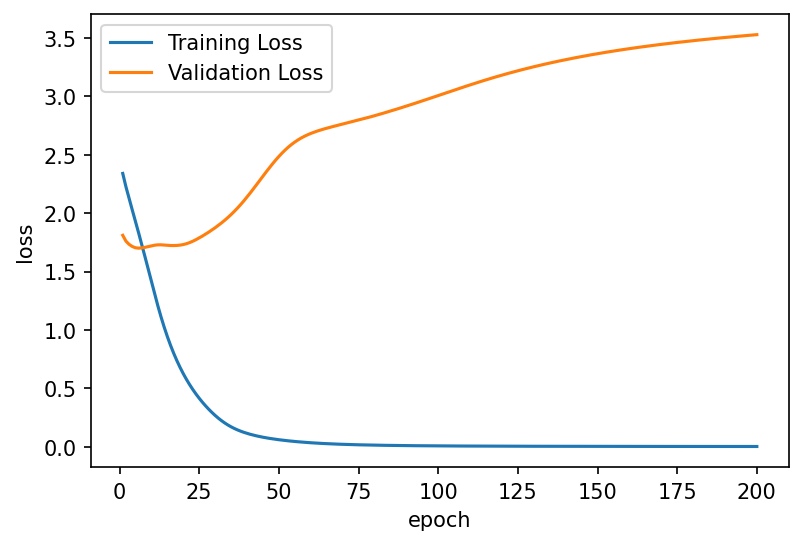

In [ ]:
t_range = torch.arange(1, 201)

fig = plt.figure(dpi=150)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(t_range, torch.FloatTensor(test_2a[1]).cpu(), label='Training Loss')
plt.plot(t_range, torch.FloatTensor(test_2a[3]).cpu(), label='Validation Loss')
plt.legend()
plt.show()

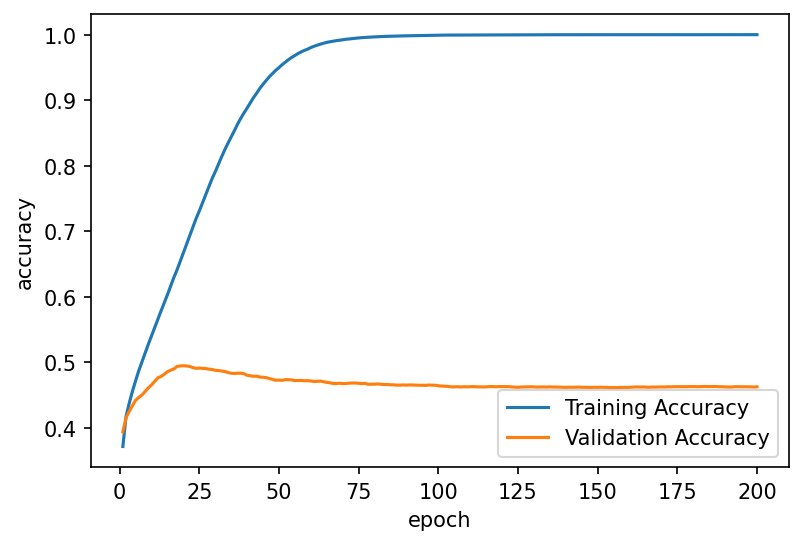

In [ ]:
t_range = torch.arange(1, 201)

fig = plt.figure(dpi=150)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(t_range, torch.FloatTensor(test_2a[0]).cpu(), label='Training Accuracy')
plt.plot(t_range, torch.FloatTensor(test_2a[2]).cpu(), label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
numel_list = [p.numel() for p in fc_model.parameters()]
sum(numel_list), numel_list

(1578506, [1572864, 512, 5120, 10])

In [11]:
fc_model = nn.Sequential(
        nn.Linear(3072, 1024),
        nn.Tanh(),
        nn.Linear(1024, 512),
        nn.Tanh(),
        nn.Linear(512, 128),
        nn.Tanh(),
        nn.Linear(128, 10),
        #nn.LogSoftmax(dim=1)
        )


if torch.cuda.device_count() >= 1:
    fc_model = torch.nn.DataParallel(fc_model)
    device = torch.device("cuda")
    fc_model.to(device)
else:
    device='cpu'


In [12]:
torch.cuda.is_available()

True

In [13]:
learning_rate = 1e-3
optimizer = optim.SGD(fc_model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

In [14]:
test_2b = training_loop(
    n_epochs = 200, 
    optimizer = optimizer,
    model = fc_model,
    loss_fn = loss_fn,   
    dataloader = dataloaders,
    device = device,)

Epoch 1/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.39it/s]


train Loss: 2.2318 Acc: 0.2417 Time: 17.626348733901978


100%|██████████| 157/157 [00:03<00:00, 49.82it/s]


val Loss: 2.0382 Acc: 0.2855 Time: 3.1620426177978516
Epoch 2/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.20it/s]


train Loss: 2.2362 Acc: 0.2936 Time: 17.31501030921936


100%|██████████| 157/157 [00:03<00:00, 50.38it/s]


val Loss: 1.9205 Acc: 0.3101 Time: 3.13030743598938
Epoch 3/200
----------


100%|██████████| 782/782 [00:18<00:00, 42.54it/s]


train Loss: 2.2509 Acc: 0.3157 Time: 18.389886140823364


100%|██████████| 157/157 [00:04<00:00, 37.52it/s]


val Loss: 1.8506 Acc: 0.3265 Time: 4.199840068817139
Epoch 4/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.75it/s]


train Loss: 2.2621 Acc: 0.3331 Time: 17.10571551322937


100%|██████████| 157/157 [00:03<00:00, 51.12it/s]


val Loss: 1.8058 Acc: 0.3401 Time: 3.080272674560547
Epoch 5/200
----------


100%|██████████| 782/782 [00:16<00:00, 46.01it/s]


train Loss: 2.2682 Acc: 0.3460 Time: 17.006734609603882


100%|██████████| 157/157 [00:03<00:00, 50.40it/s]


val Loss: 1.7723 Acc: 0.3530 Time: 3.127725839614868
Epoch 6/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.45it/s]


train Loss: 2.2686 Acc: 0.3558 Time: 17.219332456588745


100%|██████████| 157/157 [00:03<00:00, 50.28it/s]


val Loss: 1.7450 Acc: 0.3614 Time: 3.1382675170898438
Epoch 7/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.96it/s]


train Loss: 2.2639 Acc: 0.3630 Time: 17.026225566864014


100%|██████████| 157/157 [00:03<00:00, 50.11it/s]


val Loss: 1.7227 Acc: 0.3655 Time: 3.142925500869751
Epoch 8/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.60it/s]


train Loss: 2.2555 Acc: 0.3696 Time: 17.163996934890747


100%|██████████| 157/157 [00:03<00:00, 50.63it/s]


val Loss: 1.7055 Acc: 0.3718 Time: 3.115562915802002
Epoch 9/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.83it/s]


train Loss: 2.2448 Acc: 0.3745 Time: 17.07384443283081


100%|██████████| 157/157 [00:03<00:00, 49.77it/s]


val Loss: 1.6928 Acc: 0.3761 Time: 3.1659011840820312
Epoch 10/200
----------


100%|██████████| 782/782 [00:16<00:00, 46.03it/s]


train Loss: 2.2332 Acc: 0.3777 Time: 16.997050523757935


100%|██████████| 157/157 [00:03<00:00, 51.04it/s]


val Loss: 1.6838 Acc: 0.3794 Time: 3.0906529426574707
Epoch 11/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.63it/s]


train Loss: 2.2215 Acc: 0.3824 Time: 17.146225929260254


100%|██████████| 157/157 [00:03<00:00, 51.07it/s]


val Loss: 1.6777 Acc: 0.3829 Time: 3.087541341781616
Epoch 12/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.82it/s]


train Loss: 2.2101 Acc: 0.3872 Time: 17.079527378082275


100%|██████████| 157/157 [00:03<00:00, 50.97it/s]


val Loss: 1.6735 Acc: 0.3881 Time: 3.096006155014038
Epoch 13/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.34it/s]


train Loss: 2.1992 Acc: 0.3909 Time: 17.259002447128296


100%|██████████| 157/157 [00:03<00:00, 50.21it/s]


val Loss: 1.6708 Acc: 0.3906 Time: 3.1391146183013916
Epoch 14/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.68it/s]


train Loss: 2.1885 Acc: 0.3942 Time: 17.13320302963257


100%|██████████| 157/157 [00:03<00:00, 50.72it/s]


val Loss: 1.6691 Acc: 0.3935 Time: 3.1061105728149414
Epoch 15/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.62it/s]


train Loss: 2.1778 Acc: 0.3981 Time: 17.15322470664978


100%|██████████| 157/157 [00:03<00:00, 50.51it/s]


val Loss: 1.6679 Acc: 0.3964 Time: 3.116863250732422
Epoch 16/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.71it/s]


train Loss: 2.1669 Acc: 0.4014 Time: 17.127533435821533


100%|██████████| 157/157 [00:03<00:00, 50.64it/s]


val Loss: 1.6669 Acc: 0.3986 Time: 3.1205883026123047
Epoch 17/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.58it/s]


train Loss: 2.1557 Acc: 0.4037 Time: 17.16651701927185


100%|██████████| 157/157 [00:03<00:00, 50.01it/s]


val Loss: 1.6660 Acc: 0.4010 Time: 3.1527345180511475
Epoch 18/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.53it/s]


train Loss: 2.1441 Acc: 0.4073 Time: 17.18372941017151


100%|██████████| 157/157 [00:03<00:00, 50.42it/s]


val Loss: 1.6650 Acc: 0.4028 Time: 3.1247992515563965
Epoch 19/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.10it/s]


train Loss: 2.1319 Acc: 0.4099 Time: 17.35467529296875


100%|██████████| 157/157 [00:03<00:00, 49.71it/s]


val Loss: 1.6638 Acc: 0.4045 Time: 3.1708762645721436
Epoch 20/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.42it/s]


train Loss: 2.1194 Acc: 0.4126 Time: 17.232482194900513


100%|██████████| 157/157 [00:03<00:00, 50.27it/s]


val Loss: 1.6624 Acc: 0.4082 Time: 3.13560152053833
Epoch 21/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.73it/s]


train Loss: 2.1064 Acc: 0.4152 Time: 17.110244274139404


100%|██████████| 157/157 [00:03<00:00, 50.65it/s]


val Loss: 1.6609 Acc: 0.4103 Time: 3.114246129989624
Epoch 22/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.72it/s]


train Loss: 2.0930 Acc: 0.4176 Time: 17.122132301330566


100%|██████████| 157/157 [00:03<00:00, 50.25it/s]


val Loss: 1.6592 Acc: 0.4120 Time: 3.135721206665039
Epoch 23/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.61it/s]


train Loss: 2.0794 Acc: 0.4199 Time: 17.15280270576477


100%|██████████| 157/157 [00:03<00:00, 49.12it/s]


val Loss: 1.6574 Acc: 0.4139 Time: 3.206810712814331
Epoch 24/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.21it/s]


train Loss: 2.0656 Acc: 0.4223 Time: 17.303189992904663


100%|██████████| 157/157 [00:03<00:00, 51.01it/s]


val Loss: 1.6556 Acc: 0.4160 Time: 3.086862325668335
Epoch 25/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.38it/s]


train Loss: 2.0516 Acc: 0.4244 Time: 17.242414951324463


100%|██████████| 157/157 [00:03<00:00, 50.43it/s]


val Loss: 1.6537 Acc: 0.4172 Time: 3.1266374588012695
Epoch 26/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.26it/s]


train Loss: 2.0375 Acc: 0.4270 Time: 17.284353256225586


100%|██████████| 157/157 [00:03<00:00, 50.46it/s]


val Loss: 1.6519 Acc: 0.4193 Time: 3.124889612197876
Epoch 27/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.38it/s]


train Loss: 2.0233 Acc: 0.4292 Time: 17.243136644363403


100%|██████████| 157/157 [00:03<00:00, 49.94it/s]


val Loss: 1.6501 Acc: 0.4197 Time: 3.1555099487304688
Epoch 28/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.70it/s]


train Loss: 2.0092 Acc: 0.4307 Time: 17.120758295059204


100%|██████████| 157/157 [00:03<00:00, 50.55it/s]


val Loss: 1.6484 Acc: 0.4222 Time: 3.127296209335327
Epoch 29/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.15it/s]


train Loss: 1.9951 Acc: 0.4331 Time: 17.33336567878723


100%|██████████| 157/157 [00:03<00:00, 51.09it/s]


val Loss: 1.6468 Acc: 0.4242 Time: 3.08077335357666
Epoch 30/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.33it/s]


train Loss: 1.9810 Acc: 0.4354 Time: 17.26757264137268


100%|██████████| 157/157 [00:03<00:00, 50.71it/s]


val Loss: 1.6452 Acc: 0.4261 Time: 3.1069650650024414
Epoch 31/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.30it/s]


train Loss: 1.9670 Acc: 0.4372 Time: 17.274340867996216


100%|██████████| 157/157 [00:03<00:00, 50.40it/s]


val Loss: 1.6437 Acc: 0.4267 Time: 3.1297380924224854
Epoch 32/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.64it/s]


train Loss: 1.9532 Acc: 0.4386 Time: 17.146957874298096


100%|██████████| 157/157 [00:03<00:00, 49.98it/s]


val Loss: 1.6423 Acc: 0.4280 Time: 3.152174711227417
Epoch 33/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.14it/s]


train Loss: 1.9395 Acc: 0.4414 Time: 17.33304762840271


100%|██████████| 157/157 [00:03<00:00, 48.18it/s]


val Loss: 1.6411 Acc: 0.4292 Time: 3.2719886302948
Epoch 34/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.69it/s]


train Loss: 1.9259 Acc: 0.4434 Time: 17.50723361968994


100%|██████████| 157/157 [00:03<00:00, 49.00it/s]


val Loss: 1.6399 Acc: 0.4293 Time: 3.2151923179626465
Epoch 35/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.46it/s]


train Loss: 1.9124 Acc: 0.4453 Time: 17.598730087280273


100%|██████████| 157/157 [00:03<00:00, 49.23it/s]


val Loss: 1.6389 Acc: 0.4323 Time: 3.2059240341186523
Epoch 36/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.14it/s]


train Loss: 1.8992 Acc: 0.4474 Time: 17.33424425125122


100%|██████████| 157/157 [00:03<00:00, 49.78it/s]


val Loss: 1.6381 Acc: 0.4329 Time: 3.1661298274993896
Epoch 37/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.27it/s]


train Loss: 1.8861 Acc: 0.4494 Time: 17.280121088027954


100%|██████████| 157/157 [00:03<00:00, 51.26it/s]


val Loss: 1.6374 Acc: 0.4350 Time: 3.0781919956207275
Epoch 38/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.47it/s]


train Loss: 1.8732 Acc: 0.4514 Time: 17.21653151512146


100%|██████████| 157/157 [00:03<00:00, 50.42it/s]


val Loss: 1.6368 Acc: 0.4362 Time: 3.1264419555664062
Epoch 39/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.26it/s]


train Loss: 1.8604 Acc: 0.4529 Time: 17.287816762924194


100%|██████████| 157/157 [00:03<00:00, 51.00it/s]


val Loss: 1.6365 Acc: 0.4369 Time: 3.0902957916259766
Epoch 40/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.10it/s]


train Loss: 1.8477 Acc: 0.4550 Time: 17.356898546218872


100%|██████████| 157/157 [00:03<00:00, 49.96it/s]


val Loss: 1.6363 Acc: 0.4387 Time: 3.1574554443359375
Epoch 41/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.61it/s]


train Loss: 1.8352 Acc: 0.4571 Time: 17.159862518310547


100%|██████████| 157/157 [00:03<00:00, 51.63it/s]


val Loss: 1.6363 Acc: 0.4415 Time: 3.055046796798706
Epoch 42/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.36it/s]


train Loss: 1.8228 Acc: 0.4594 Time: 17.25337791442871


100%|██████████| 157/157 [00:03<00:00, 51.69it/s]


val Loss: 1.6365 Acc: 0.4429 Time: 3.054039716720581
Epoch 43/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.41it/s]


train Loss: 1.8104 Acc: 0.4616 Time: 17.232693910598755


100%|██████████| 157/157 [00:03<00:00, 50.84it/s]


val Loss: 1.6368 Acc: 0.4443 Time: 3.1052372455596924
Epoch 44/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.26it/s]


train Loss: 1.7980 Acc: 0.4640 Time: 17.293904304504395


100%|██████████| 157/157 [00:03<00:00, 48.85it/s]


val Loss: 1.6374 Acc: 0.4453 Time: 3.2316484451293945
Epoch 45/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.06it/s]


train Loss: 1.7856 Acc: 0.4659 Time: 17.370330572128296


100%|██████████| 157/157 [00:03<00:00, 50.29it/s]


val Loss: 1.6381 Acc: 0.4463 Time: 3.1328604221343994
Epoch 46/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.20it/s]


train Loss: 1.7731 Acc: 0.4679 Time: 17.30884599685669


100%|██████████| 157/157 [00:03<00:00, 49.51it/s]


val Loss: 1.6390 Acc: 0.4477 Time: 3.181969165802002
Epoch 47/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.54it/s]


train Loss: 1.7606 Acc: 0.4697 Time: 17.178597688674927


100%|██████████| 157/157 [00:03<00:00, 50.39it/s]


val Loss: 1.6401 Acc: 0.4487 Time: 3.129551649093628
Epoch 48/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.47it/s]


train Loss: 1.7480 Acc: 0.4721 Time: 17.206504821777344


100%|██████████| 157/157 [00:03<00:00, 50.51it/s]


val Loss: 1.6413 Acc: 0.4497 Time: 3.121642589569092
Epoch 49/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.57it/s]


train Loss: 1.7352 Acc: 0.4739 Time: 17.173227548599243


100%|██████████| 157/157 [00:03<00:00, 49.05it/s]


val Loss: 1.6427 Acc: 0.4509 Time: 3.2158727645874023
Epoch 50/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.11it/s]


train Loss: 1.7222 Acc: 0.4762 Time: 17.346189260482788


100%|██████████| 157/157 [00:03<00:00, 50.55it/s]


val Loss: 1.6442 Acc: 0.4522 Time: 3.1215744018554688
Epoch 51/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.80it/s]


train Loss: 1.7090 Acc: 0.4789 Time: 17.466444730758667


100%|██████████| 157/157 [00:03<00:00, 49.65it/s]


val Loss: 1.6459 Acc: 0.4528 Time: 3.1780123710632324
Epoch 52/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.03it/s]


train Loss: 1.6956 Acc: 0.4810 Time: 17.380932569503784


100%|██████████| 157/157 [00:03<00:00, 49.17it/s]


val Loss: 1.6477 Acc: 0.4546 Time: 3.20896577835083
Epoch 53/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.66it/s]


train Loss: 1.6819 Acc: 0.4828 Time: 17.517094135284424


100%|██████████| 157/157 [00:03<00:00, 50.37it/s]


val Loss: 1.6496 Acc: 0.4561 Time: 3.1324591636657715
Epoch 54/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.45it/s]


train Loss: 1.6679 Acc: 0.4854 Time: 17.21825909614563


100%|██████████| 157/157 [00:03<00:00, 50.51it/s]


val Loss: 1.6516 Acc: 0.4578 Time: 3.1163978576660156
Epoch 55/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.65it/s]


train Loss: 1.6536 Acc: 0.4875 Time: 17.14318346977234


100%|██████████| 157/157 [00:03<00:00, 51.37it/s]


val Loss: 1.6537 Acc: 0.4591 Time: 3.0655126571655273
Epoch 56/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.10it/s]


train Loss: 1.6391 Acc: 0.4899 Time: 17.348768949508667


100%|██████████| 157/157 [00:03<00:00, 50.84it/s]


val Loss: 1.6560 Acc: 0.4600 Time: 3.096993923187256
Epoch 57/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.55it/s]


train Loss: 1.6242 Acc: 0.4925 Time: 17.177745580673218


100%|██████████| 157/157 [00:03<00:00, 50.62it/s]


val Loss: 1.6583 Acc: 0.4605 Time: 3.114353656768799
Epoch 58/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.39it/s]


train Loss: 1.6089 Acc: 0.4946 Time: 17.241031169891357


100%|██████████| 157/157 [00:03<00:00, 50.63it/s]


val Loss: 1.6607 Acc: 0.4617 Time: 3.108250379562378
Epoch 59/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.67it/s]


train Loss: 1.5934 Acc: 0.4976 Time: 17.133384466171265


100%|██████████| 157/157 [00:03<00:00, 50.33it/s]


val Loss: 1.6631 Acc: 0.4624 Time: 3.140610933303833
Epoch 60/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.61it/s]


train Loss: 1.5775 Acc: 0.4998 Time: 17.15384602546692


100%|██████████| 157/157 [00:03<00:00, 50.78it/s]


val Loss: 1.6657 Acc: 0.4644 Time: 3.108114719390869
Epoch 61/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.06it/s]


train Loss: 1.5612 Acc: 0.5026 Time: 17.367366075515747


100%|██████████| 157/157 [00:03<00:00, 50.51it/s]


val Loss: 1.6683 Acc: 0.4650 Time: 3.1243679523468018
Epoch 62/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.21it/s]


train Loss: 1.5446 Acc: 0.5047 Time: 17.306445360183716


100%|██████████| 157/157 [00:03<00:00, 50.97it/s]


val Loss: 1.6709 Acc: 0.4653 Time: 3.0948524475097656
Epoch 63/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.58it/s]


train Loss: 1.5277 Acc: 0.5071 Time: 17.165776252746582


100%|██████████| 157/157 [00:03<00:00, 49.79it/s]


val Loss: 1.6737 Acc: 0.4665 Time: 3.166888952255249
Epoch 64/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.50it/s]


train Loss: 1.5105 Acc: 0.5092 Time: 17.19462513923645


100%|██████████| 157/157 [00:03<00:00, 49.71it/s]


val Loss: 1.6764 Acc: 0.4673 Time: 3.173293113708496
Epoch 65/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.13it/s]


train Loss: 1.4929 Acc: 0.5113 Time: 17.34463119506836


100%|██████████| 157/157 [00:03<00:00, 50.32it/s]


val Loss: 1.6793 Acc: 0.4685 Time: 3.1279351711273193
Epoch 66/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.66it/s]


train Loss: 1.4751 Acc: 0.5141 Time: 17.13677453994751


100%|██████████| 157/157 [00:03<00:00, 50.91it/s]


val Loss: 1.6822 Acc: 0.4700 Time: 3.1045117378234863
Epoch 67/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.01it/s]


train Loss: 1.4568 Acc: 0.5163 Time: 17.382671117782593


100%|██████████| 157/157 [00:03<00:00, 51.25it/s]


val Loss: 1.6852 Acc: 0.4714 Time: 3.074706554412842
Epoch 68/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.78it/s]


train Loss: 1.4383 Acc: 0.5186 Time: 17.47383713722229


100%|██████████| 157/157 [00:03<00:00, 49.38it/s]


val Loss: 1.6883 Acc: 0.4722 Time: 3.1888015270233154
Epoch 69/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.74it/s]


train Loss: 1.4194 Acc: 0.5206 Time: 17.489431619644165


100%|██████████| 157/157 [00:03<00:00, 49.20it/s]


val Loss: 1.6915 Acc: 0.4741 Time: 3.2048206329345703
Epoch 70/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.75it/s]


train Loss: 1.4002 Acc: 0.5232 Time: 17.484511137008667


100%|██████████| 157/157 [00:03<00:00, 50.57it/s]


val Loss: 1.6948 Acc: 0.4742 Time: 3.1125147342681885
Epoch 71/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.91it/s]


train Loss: 1.3806 Acc: 0.5260 Time: 17.43043327331543


100%|██████████| 157/157 [00:03<00:00, 50.35it/s]


val Loss: 1.6981 Acc: 0.4745 Time: 3.1355648040771484
Epoch 72/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.10it/s]


train Loss: 1.3607 Acc: 0.5284 Time: 17.3495831489563


100%|██████████| 157/157 [00:03<00:00, 49.49it/s]


val Loss: 1.7016 Acc: 0.4755 Time: 3.1825015544891357
Epoch 73/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.34it/s]


train Loss: 1.3404 Acc: 0.5310 Time: 17.266743421554565


100%|██████████| 157/157 [00:03<00:00, 50.71it/s]


val Loss: 1.7051 Acc: 0.4755 Time: 3.1093082427978516
Epoch 74/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.30it/s]


train Loss: 1.3197 Acc: 0.5331 Time: 17.27165985107422


100%|██████████| 157/157 [00:03<00:00, 50.30it/s]


val Loss: 1.7087 Acc: 0.4772 Time: 3.1396775245666504
Epoch 75/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.49it/s]


train Loss: 1.2987 Acc: 0.5354 Time: 17.201210021972656


100%|██████████| 157/157 [00:03<00:00, 50.27it/s]


val Loss: 1.7124 Acc: 0.4772 Time: 3.1307642459869385
Epoch 76/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.03it/s]


train Loss: 1.2773 Acc: 0.5377 Time: 17.37611746788025


100%|██████████| 157/157 [00:03<00:00, 48.79it/s]


val Loss: 1.7162 Acc: 0.4770 Time: 3.233715295791626
Epoch 77/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.68it/s]


train Loss: 1.2556 Acc: 0.5406 Time: 17.5127956867218


100%|██████████| 157/157 [00:03<00:00, 49.73it/s]


val Loss: 1.7201 Acc: 0.4774 Time: 3.17276930809021
Epoch 78/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.59it/s]


train Loss: 1.2336 Acc: 0.5436 Time: 17.550142765045166


100%|██████████| 157/157 [00:03<00:00, 49.91it/s]


val Loss: 1.7239 Acc: 0.4777 Time: 3.1529624462127686
Epoch 79/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.60it/s]


train Loss: 1.2112 Acc: 0.5469 Time: 17.542676210403442


100%|██████████| 157/157 [00:03<00:00, 49.22it/s]


val Loss: 1.7278 Acc: 0.4786 Time: 3.2044036388397217
Epoch 80/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.64it/s]


train Loss: 1.1885 Acc: 0.5491 Time: 17.528955459594727


100%|██████████| 157/157 [00:03<00:00, 50.25it/s]


val Loss: 1.7318 Acc: 0.4793 Time: 3.1371326446533203
Epoch 81/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.50it/s]


train Loss: 1.1655 Acc: 0.5518 Time: 17.19918131828308


100%|██████████| 157/157 [00:03<00:00, 50.78it/s]


val Loss: 1.7358 Acc: 0.4795 Time: 3.1072847843170166
Epoch 82/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.22it/s]


train Loss: 1.1423 Acc: 0.5547 Time: 17.3072669506073


100%|██████████| 157/157 [00:03<00:00, 51.35it/s]


val Loss: 1.7397 Acc: 0.4812 Time: 3.0709946155548096
Epoch 83/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.99it/s]


train Loss: 1.1189 Acc: 0.5579 Time: 17.390034675598145


100%|██████████| 157/157 [00:03<00:00, 51.22it/s]


val Loss: 1.7437 Acc: 0.4825 Time: 3.0780673027038574
Epoch 84/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.22it/s]


train Loss: 1.0954 Acc: 0.5609 Time: 17.304476499557495


100%|██████████| 157/157 [00:03<00:00, 50.60it/s]


val Loss: 1.7478 Acc: 0.4832 Time: 3.1121907234191895
Epoch 85/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.33it/s]


train Loss: 1.0718 Acc: 0.5638 Time: 17.263094186782837


100%|██████████| 157/157 [00:03<00:00, 49.27it/s]


val Loss: 1.7518 Acc: 0.4830 Time: 3.202166795730591
Epoch 86/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.01it/s]


train Loss: 1.0481 Acc: 0.5668 Time: 17.385052919387817


100%|██████████| 157/157 [00:03<00:00, 50.48it/s]


val Loss: 1.7559 Acc: 0.4828 Time: 3.1250410079956055
Epoch 87/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.14it/s]


train Loss: 1.0245 Acc: 0.5697 Time: 17.33442783355713


100%|██████████| 157/157 [00:03<00:00, 49.55it/s]


val Loss: 1.7601 Acc: 0.4826 Time: 3.179389476776123
Epoch 88/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.37it/s]


train Loss: 1.0010 Acc: 0.5735 Time: 17.24778461456299


100%|██████████| 157/157 [00:03<00:00, 50.34it/s]


val Loss: 1.7643 Acc: 0.4824 Time: 3.1284265518188477
Epoch 89/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.31it/s]


train Loss: 0.9777 Acc: 0.5772 Time: 17.272650241851807


100%|██████████| 157/157 [00:03<00:00, 50.09it/s]


val Loss: 1.7686 Acc: 0.4823 Time: 3.1420509815216064
Epoch 90/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.18it/s]


train Loss: 0.9545 Acc: 0.5805 Time: 17.315139055252075


100%|██████████| 157/157 [00:03<00:00, 49.40it/s]


val Loss: 1.7731 Acc: 0.4827 Time: 3.191974401473999
Epoch 91/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.35it/s]


train Loss: 0.9316 Acc: 0.5838 Time: 17.25593662261963


100%|██████████| 157/157 [00:03<00:00, 49.63it/s]


val Loss: 1.7776 Acc: 0.4833 Time: 3.172220468521118
Epoch 92/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.47it/s]


train Loss: 0.9090 Acc: 0.5874 Time: 17.206249713897705


100%|██████████| 157/157 [00:03<00:00, 49.24it/s]


val Loss: 1.7824 Acc: 0.4832 Time: 3.203101634979248
Epoch 93/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.31it/s]


train Loss: 0.8868 Acc: 0.5911 Time: 17.267637014389038


100%|██████████| 157/157 [00:03<00:00, 49.88it/s]


val Loss: 1.7873 Acc: 0.4839 Time: 3.1668214797973633
Epoch 94/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.18it/s]


train Loss: 0.8649 Acc: 0.5944 Time: 17.317269802093506


100%|██████████| 157/157 [00:03<00:00, 49.96it/s]


val Loss: 1.7924 Acc: 0.4843 Time: 3.1546614170074463
Epoch 95/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.91it/s]


train Loss: 0.8435 Acc: 0.5983 Time: 17.42715048789978


100%|██████████| 157/157 [00:03<00:00, 49.95it/s]


val Loss: 1.7978 Acc: 0.4850 Time: 3.154099941253662
Epoch 96/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.83it/s]


train Loss: 0.8225 Acc: 0.6016 Time: 17.457841157913208


100%|██████████| 157/157 [00:03<00:00, 49.76it/s]


val Loss: 1.8034 Acc: 0.4864 Time: 3.165830373764038
Epoch 97/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.65it/s]


train Loss: 0.8019 Acc: 0.6056 Time: 17.52609634399414


100%|██████████| 157/157 [00:03<00:00, 50.01it/s]


val Loss: 1.8093 Acc: 0.4863 Time: 3.147351026535034
Epoch 98/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.85it/s]


train Loss: 0.7818 Acc: 0.6099 Time: 17.443830490112305


100%|██████████| 157/157 [00:03<00:00, 48.82it/s]


val Loss: 1.8155 Acc: 0.4868 Time: 3.234196424484253
Epoch 99/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.65it/s]


train Loss: 0.7622 Acc: 0.6130 Time: 17.14162254333496


100%|██████████| 157/157 [00:03<00:00, 51.95it/s]


val Loss: 1.8220 Acc: 0.4872 Time: 3.031759023666382
Epoch 100/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.74it/s]


train Loss: 0.7431 Acc: 0.6166 Time: 17.11046814918518


100%|██████████| 157/157 [00:03<00:00, 50.93it/s]


val Loss: 1.8288 Acc: 0.4886 Time: 3.0946567058563232
Epoch 101/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.79it/s]


train Loss: 0.7244 Acc: 0.6206 Time: 17.472317218780518


100%|██████████| 157/157 [00:03<00:00, 49.37it/s]


val Loss: 1.8359 Acc: 0.4892 Time: 3.194976568222046
Epoch 102/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.78it/s]


train Loss: 0.7061 Acc: 0.6245 Time: 17.473572254180908


100%|██████████| 157/157 [00:03<00:00, 50.40it/s]


val Loss: 1.8433 Acc: 0.4888 Time: 3.1268928050994873
Epoch 103/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.36it/s]


train Loss: 0.6884 Acc: 0.6283 Time: 17.249070405960083


100%|██████████| 157/157 [00:03<00:00, 49.30it/s]


val Loss: 1.8510 Acc: 0.4886 Time: 3.198152542114258
Epoch 104/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.15it/s]


train Loss: 0.6710 Acc: 0.6321 Time: 17.334113121032715


100%|██████████| 157/157 [00:03<00:00, 50.13it/s]


val Loss: 1.8591 Acc: 0.4885 Time: 3.1453652381896973
Epoch 105/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.39it/s]


train Loss: 0.6540 Acc: 0.6357 Time: 17.242218017578125


100%|██████████| 157/157 [00:03<00:00, 50.71it/s]


val Loss: 1.8674 Acc: 0.4893 Time: 3.112347364425659
Epoch 106/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.20it/s]


train Loss: 0.6375 Acc: 0.6397 Time: 17.313024044036865


100%|██████████| 157/157 [00:03<00:00, 49.41it/s]


val Loss: 1.8759 Acc: 0.4892 Time: 3.1930205821990967
Epoch 107/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.06it/s]


train Loss: 0.6213 Acc: 0.6441 Time: 17.37034797668457


100%|██████████| 157/157 [00:03<00:00, 50.49it/s]


val Loss: 1.8847 Acc: 0.4900 Time: 3.1198410987854004
Epoch 108/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.01it/s]


train Loss: 0.6054 Acc: 0.6482 Time: 17.388480186462402


100%|██████████| 157/157 [00:03<00:00, 50.54it/s]


val Loss: 1.8937 Acc: 0.4895 Time: 3.115185499191284
Epoch 109/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.98it/s]


train Loss: 0.5899 Acc: 0.6527 Time: 17.395742416381836


100%|██████████| 157/157 [00:03<00:00, 49.23it/s]


val Loss: 1.9028 Acc: 0.4894 Time: 3.2022950649261475
Epoch 110/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.83it/s]


train Loss: 0.5748 Acc: 0.6564 Time: 17.45136022567749


100%|██████████| 157/157 [00:03<00:00, 50.20it/s]


val Loss: 1.9120 Acc: 0.4894 Time: 3.1464269161224365
Epoch 111/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.83it/s]


train Loss: 0.5600 Acc: 0.6606 Time: 17.452449560165405


100%|██████████| 157/157 [00:03<00:00, 49.73it/s]


val Loss: 1.9213 Acc: 0.4897 Time: 3.1695122718811035
Epoch 112/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.26it/s]


train Loss: 0.5454 Acc: 0.6650 Time: 17.295574188232422


100%|██████████| 157/157 [00:03<00:00, 50.16it/s]


val Loss: 1.9306 Acc: 0.4890 Time: 3.139458656311035
Epoch 113/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.87it/s]


train Loss: 0.5312 Acc: 0.6685 Time: 17.436332941055298


100%|██████████| 157/157 [00:03<00:00, 49.88it/s]


val Loss: 1.9400 Acc: 0.4878 Time: 3.1580944061279297
Epoch 114/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.59it/s]


train Loss: 0.5173 Acc: 0.6727 Time: 17.16805100440979


100%|██████████| 157/157 [00:03<00:00, 51.61it/s]


val Loss: 1.9493 Acc: 0.4874 Time: 3.053736925125122
Epoch 115/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.35it/s]


train Loss: 0.5036 Acc: 0.6769 Time: 17.251006841659546


100%|██████████| 157/157 [00:03<00:00, 49.54it/s]


val Loss: 1.9586 Acc: 0.4869 Time: 3.1813831329345703
Epoch 116/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.22it/s]


train Loss: 0.4902 Acc: 0.6812 Time: 17.69621205329895


100%|██████████| 157/157 [00:03<00:00, 49.16it/s]


val Loss: 1.9679 Acc: 0.4861 Time: 3.2090439796447754
Epoch 117/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.74it/s]


train Loss: 0.4771 Acc: 0.6858 Time: 17.49017095565796


100%|██████████| 157/157 [00:03<00:00, 50.17it/s]


val Loss: 1.9770 Acc: 0.4854 Time: 3.1394436359405518
Epoch 118/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.99it/s]


train Loss: 0.4643 Acc: 0.6904 Time: 17.392751455307007


100%|██████████| 157/157 [00:03<00:00, 50.75it/s]


val Loss: 1.9860 Acc: 0.4857 Time: 3.1068928241729736
Epoch 119/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.88it/s]


train Loss: 0.4516 Acc: 0.6946 Time: 17.433359384536743


100%|██████████| 157/157 [00:03<00:00, 48.81it/s]


val Loss: 1.9949 Acc: 0.4853 Time: 3.223433494567871
Epoch 120/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.03it/s]


train Loss: 0.4392 Acc: 0.6981 Time: 17.375433921813965


100%|██████████| 157/157 [00:03<00:00, 50.94it/s]


val Loss: 2.0036 Acc: 0.4842 Time: 3.097898006439209
Epoch 121/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.12it/s]


train Loss: 0.4271 Acc: 0.7026 Time: 17.34624695777893


100%|██████████| 157/157 [00:03<00:00, 50.53it/s]


val Loss: 2.0122 Acc: 0.4847 Time: 3.119884729385376
Epoch 122/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.32it/s]


train Loss: 0.4152 Acc: 0.7073 Time: 17.261322021484375


100%|██████████| 157/157 [00:03<00:00, 49.90it/s]


val Loss: 2.0206 Acc: 0.4843 Time: 3.167525291442871
Epoch 123/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.85it/s]


train Loss: 0.4034 Acc: 0.7114 Time: 17.444575786590576


100%|██████████| 157/157 [00:03<00:00, 49.86it/s]


val Loss: 2.0288 Acc: 0.4835 Time: 3.1628243923187256
Epoch 124/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.32it/s]


train Loss: 0.3919 Acc: 0.7155 Time: 17.262545108795166


100%|██████████| 157/157 [00:03<00:00, 50.50it/s]


val Loss: 2.0368 Acc: 0.4840 Time: 3.1282362937927246
Epoch 125/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.00it/s]


train Loss: 0.3806 Acc: 0.7199 Time: 17.383177995681763


100%|██████████| 157/157 [00:03<00:00, 50.11it/s]


val Loss: 2.0447 Acc: 0.4823 Time: 3.1474034786224365
Epoch 126/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.86it/s]


train Loss: 0.3695 Acc: 0.7244 Time: 17.448058128356934


100%|██████████| 157/157 [00:03<00:00, 49.14it/s]


val Loss: 2.0523 Acc: 0.4823 Time: 3.2078988552093506
Epoch 127/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.60it/s]


train Loss: 0.3586 Acc: 0.7286 Time: 17.549195528030396


100%|██████████| 157/157 [00:03<00:00, 50.18it/s]


val Loss: 2.0598 Acc: 0.4833 Time: 3.1404519081115723
Epoch 128/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.85it/s]


train Loss: 0.3479 Acc: 0.7333 Time: 17.45094060897827


100%|██████████| 157/157 [00:03<00:00, 49.50it/s]


val Loss: 2.0671 Acc: 0.4829 Time: 3.1835687160491943
Epoch 129/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.64it/s]


train Loss: 0.3373 Acc: 0.7376 Time: 17.534053802490234


100%|██████████| 157/157 [00:03<00:00, 49.30it/s]


val Loss: 2.0742 Acc: 0.4825 Time: 3.1958987712860107
Epoch 130/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.63it/s]


train Loss: 0.3270 Acc: 0.7416 Time: 17.538180828094482


100%|██████████| 157/157 [00:03<00:00, 49.32it/s]


val Loss: 2.0811 Acc: 0.4819 Time: 3.194190502166748
Epoch 131/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.11it/s]


train Loss: 0.3168 Acc: 0.7463 Time: 17.73842191696167


100%|██████████| 157/157 [00:03<00:00, 48.17it/s]


val Loss: 2.0878 Acc: 0.4820 Time: 3.2711265087127686
Epoch 132/200
----------


100%|██████████| 782/782 [00:17<00:00, 43.81it/s]


train Loss: 0.3069 Acc: 0.7504 Time: 17.864885568618774


100%|██████████| 157/157 [00:03<00:00, 49.29it/s]


val Loss: 2.0943 Acc: 0.4828 Time: 3.2022008895874023
Epoch 133/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.03it/s]


train Loss: 0.2971 Acc: 0.7545 Time: 17.376615285873413


100%|██████████| 157/157 [00:03<00:00, 48.63it/s]


val Loss: 2.1007 Acc: 0.4829 Time: 3.2448835372924805
Epoch 134/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.11it/s]


train Loss: 0.2876 Acc: 0.7586 Time: 17.734487771987915


100%|██████████| 157/157 [00:03<00:00, 49.43it/s]


val Loss: 2.1068 Acc: 0.4832 Time: 3.1901164054870605
Epoch 135/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.95it/s]


train Loss: 0.2782 Acc: 0.7627 Time: 17.412302494049072


100%|██████████| 157/157 [00:03<00:00, 49.70it/s]


val Loss: 2.1129 Acc: 0.4838 Time: 3.1713855266571045
Epoch 136/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.89it/s]


train Loss: 0.2691 Acc: 0.7671 Time: 17.43089485168457


100%|██████████| 157/157 [00:03<00:00, 47.99it/s]


val Loss: 2.1189 Acc: 0.4827 Time: 3.283782482147217
Epoch 137/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.75it/s]


train Loss: 0.2602 Acc: 0.7717 Time: 17.48818278312683


100%|██████████| 157/157 [00:03<00:00, 49.68it/s]


val Loss: 2.1249 Acc: 0.4826 Time: 3.1747677326202393
Epoch 138/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.06it/s]


train Loss: 0.2514 Acc: 0.7756 Time: 17.3679256439209


100%|██████████| 157/157 [00:03<00:00, 49.91it/s]


val Loss: 2.1308 Acc: 0.4821 Time: 3.1531338691711426
Epoch 139/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.15it/s]


train Loss: 0.2430 Acc: 0.7797 Time: 17.333767652511597


100%|██████████| 157/157 [00:03<00:00, 51.80it/s]


val Loss: 2.1369 Acc: 0.4811 Time: 3.0447049140930176
Epoch 140/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.91it/s]


train Loss: 0.2347 Acc: 0.7839 Time: 17.047715663909912


100%|██████████| 157/157 [00:03<00:00, 50.32it/s]


val Loss: 2.1431 Acc: 0.4805 Time: 3.1295549869537354
Epoch 141/200
----------


100%|██████████| 782/782 [00:16<00:00, 46.28it/s]


train Loss: 0.2267 Acc: 0.7889 Time: 16.90456771850586


100%|██████████| 157/157 [00:03<00:00, 49.41it/s]


val Loss: 2.1495 Acc: 0.4804 Time: 3.185847043991089
Epoch 142/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.08it/s]


train Loss: 0.2190 Acc: 0.7929 Time: 17.355923652648926


100%|██████████| 157/157 [00:03<00:00, 51.38it/s]


val Loss: 2.1561 Acc: 0.4799 Time: 3.0698859691619873
Epoch 143/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.24it/s]


train Loss: 0.2115 Acc: 0.7973 Time: 17.299007415771484


100%|██████████| 157/157 [00:03<00:00, 49.73it/s]


val Loss: 2.1629 Acc: 0.4796 Time: 3.1741583347320557
Epoch 144/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.80it/s]


train Loss: 0.2042 Acc: 0.8015 Time: 17.463752031326294


100%|██████████| 157/157 [00:03<00:00, 51.04it/s]


val Loss: 2.1700 Acc: 0.4783 Time: 3.086644411087036
Epoch 145/200
----------


100%|██████████| 782/782 [00:17<00:00, 44.85it/s]


train Loss: 0.1972 Acc: 0.8063 Time: 17.443854331970215


100%|██████████| 157/157 [00:03<00:00, 50.07it/s]


val Loss: 2.1775 Acc: 0.4780 Time: 3.143103837966919
Epoch 146/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.05it/s]


train Loss: 0.1904 Acc: 0.8111 Time: 17.372053623199463


100%|██████████| 157/157 [00:03<00:00, 51.53it/s]


val Loss: 2.1853 Acc: 0.4773 Time: 3.054957866668701
Epoch 147/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.60it/s]


train Loss: 0.1839 Acc: 0.8152 Time: 17.16161012649536


100%|██████████| 157/157 [00:03<00:00, 50.85it/s]


val Loss: 2.1935 Acc: 0.4766 Time: 3.0968477725982666
Epoch 148/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.49it/s]


train Loss: 0.1776 Acc: 0.8196 Time: 17.20357584953308


100%|██████████| 157/157 [00:03<00:00, 50.33it/s]


val Loss: 2.2021 Acc: 0.4762 Time: 3.1321964263916016
Epoch 149/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.97it/s]


train Loss: 0.1715 Acc: 0.8241 Time: 17.023597478866577


100%|██████████| 157/157 [00:03<00:00, 50.96it/s]


val Loss: 2.2111 Acc: 0.4755 Time: 3.093404531478882
Epoch 150/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.71it/s]


train Loss: 0.1657 Acc: 0.8280 Time: 17.121196269989014


100%|██████████| 157/157 [00:03<00:00, 51.65it/s]


val Loss: 2.2204 Acc: 0.4744 Time: 3.0511057376861572
Epoch 151/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.58it/s]


train Loss: 0.1601 Acc: 0.8317 Time: 17.1676983833313


100%|██████████| 157/157 [00:03<00:00, 49.22it/s]


val Loss: 2.2301 Acc: 0.4731 Time: 3.1989474296569824
Epoch 152/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.44it/s]


train Loss: 0.1547 Acc: 0.8356 Time: 17.22163200378418


100%|██████████| 157/157 [00:03<00:00, 50.77it/s]


val Loss: 2.2401 Acc: 0.4730 Time: 3.1047887802124023
Epoch 153/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.86it/s]


train Loss: 0.1496 Acc: 0.8402 Time: 17.061529397964478


100%|██████████| 157/157 [00:03<00:00, 51.82it/s]


val Loss: 2.2504 Acc: 0.4732 Time: 3.037571668624878
Epoch 154/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.76it/s]


train Loss: 0.1447 Acc: 0.8442 Time: 17.09694528579712


100%|██████████| 157/157 [00:03<00:00, 50.98it/s]


val Loss: 2.2609 Acc: 0.4722 Time: 3.099226236343384
Epoch 155/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.65it/s]


train Loss: 0.1399 Acc: 0.8486 Time: 17.14183473587036


100%|██████████| 157/157 [00:03<00:00, 50.03it/s]


val Loss: 2.2715 Acc: 0.4721 Time: 3.157531976699829
Epoch 156/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.27it/s]


train Loss: 0.1354 Acc: 0.8528 Time: 17.28146243095398


100%|██████████| 157/157 [00:03<00:00, 50.54it/s]


val Loss: 2.2822 Acc: 0.4716 Time: 3.119894027709961
Epoch 157/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.48it/s]


train Loss: 0.1310 Acc: 0.8566 Time: 17.20829749107361


100%|██████████| 157/157 [00:03<00:00, 50.84it/s]


val Loss: 2.2928 Acc: 0.4705 Time: 3.097233533859253
Epoch 158/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.10it/s]


train Loss: 0.1269 Acc: 0.8605 Time: 17.352724313735962


100%|██████████| 157/157 [00:03<00:00, 49.38it/s]


val Loss: 2.3034 Acc: 0.4701 Time: 3.187037229537964
Epoch 159/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.72it/s]


train Loss: 0.1229 Acc: 0.8643 Time: 17.11802840232849


100%|██████████| 157/157 [00:03<00:00, 49.46it/s]


val Loss: 2.3137 Acc: 0.4702 Time: 3.1824541091918945
Epoch 160/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.35it/s]


train Loss: 0.1190 Acc: 0.8678 Time: 17.258983612060547


100%|██████████| 157/157 [00:03<00:00, 50.53it/s]


val Loss: 2.3239 Acc: 0.4693 Time: 3.1143746376037598
Epoch 161/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.60it/s]


train Loss: 0.1153 Acc: 0.8710 Time: 17.16187357902527


100%|██████████| 157/157 [00:03<00:00, 50.11it/s]


val Loss: 2.3338 Acc: 0.4694 Time: 3.144029378890991
Epoch 162/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.84it/s]


train Loss: 0.1118 Acc: 0.8752 Time: 17.06727170944214


100%|██████████| 157/157 [00:03<00:00, 50.86it/s]


val Loss: 2.3434 Acc: 0.4691 Time: 3.102797508239746
Epoch 163/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.85it/s]


train Loss: 0.1084 Acc: 0.8791 Time: 17.06857681274414


100%|██████████| 157/157 [00:03<00:00, 50.28it/s]


val Loss: 2.3527 Acc: 0.4673 Time: 3.136617422103882
Epoch 164/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.96it/s]


train Loss: 0.1052 Acc: 0.8828 Time: 17.020509719848633


100%|██████████| 157/157 [00:03<00:00, 48.52it/s]


val Loss: 2.3618 Acc: 0.4672 Time: 3.244781017303467
Epoch 165/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.62it/s]


train Loss: 0.1020 Acc: 0.8867 Time: 17.155876398086548


100%|██████████| 157/157 [00:03<00:00, 50.58it/s]


val Loss: 2.3706 Acc: 0.4675 Time: 3.1165409088134766
Epoch 166/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.67it/s]


train Loss: 0.0990 Acc: 0.8903 Time: 17.13240122795105


100%|██████████| 157/157 [00:03<00:00, 50.08it/s]


val Loss: 2.3793 Acc: 0.4666 Time: 3.1436355113983154
Epoch 167/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.83it/s]


train Loss: 0.0961 Acc: 0.8943 Time: 17.078824996948242


100%|██████████| 157/157 [00:03<00:00, 50.34it/s]


val Loss: 2.3877 Acc: 0.4657 Time: 3.132023572921753
Epoch 168/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.53it/s]


train Loss: 0.0933 Acc: 0.8978 Time: 17.19434142112732


100%|██████████| 157/157 [00:03<00:00, 50.97it/s]


val Loss: 2.3961 Acc: 0.4658 Time: 3.0938403606414795
Epoch 169/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.35it/s]


train Loss: 0.0906 Acc: 0.9017 Time: 17.263249397277832


100%|██████████| 157/157 [00:03<00:00, 49.89it/s]


val Loss: 2.4043 Acc: 0.4654 Time: 3.1690406799316406
Epoch 170/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.65it/s]


train Loss: 0.0880 Acc: 0.9049 Time: 17.147790670394897


100%|██████████| 157/157 [00:03<00:00, 49.76it/s]


val Loss: 2.4124 Acc: 0.4657 Time: 3.1635844707489014
Epoch 171/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.07it/s]


train Loss: 0.0855 Acc: 0.9080 Time: 17.362891912460327


100%|██████████| 157/157 [00:03<00:00, 50.01it/s]


val Loss: 2.4205 Acc: 0.4644 Time: 3.148219347000122
Epoch 172/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.52it/s]


train Loss: 0.0831 Acc: 0.9117 Time: 17.196808576583862


100%|██████████| 157/157 [00:03<00:00, 50.11it/s]


val Loss: 2.4286 Acc: 0.4637 Time: 3.1518478393554688
Epoch 173/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.44it/s]


train Loss: 0.0807 Acc: 0.9147 Time: 17.214558839797974


100%|██████████| 157/157 [00:03<00:00, 50.66it/s]


val Loss: 2.4367 Acc: 0.4629 Time: 3.108180046081543
Epoch 174/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.65it/s]


train Loss: 0.0784 Acc: 0.9176 Time: 17.144863605499268


100%|██████████| 157/157 [00:03<00:00, 50.64it/s]


val Loss: 2.4448 Acc: 0.4624 Time: 3.1090898513793945
Epoch 175/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.62it/s]


train Loss: 0.0761 Acc: 0.9207 Time: 17.149830102920532


100%|██████████| 157/157 [00:03<00:00, 50.36it/s]


val Loss: 2.4529 Acc: 0.4630 Time: 3.124382972717285
Epoch 176/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.71it/s]


train Loss: 0.0739 Acc: 0.9234 Time: 17.120194911956787


100%|██████████| 157/157 [00:03<00:00, 51.25it/s]


val Loss: 2.4612 Acc: 0.4623 Time: 3.079515218734741
Epoch 177/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.91it/s]


train Loss: 0.0718 Acc: 0.9265 Time: 17.041805744171143


100%|██████████| 157/157 [00:03<00:00, 50.13it/s]


val Loss: 2.4695 Acc: 0.4624 Time: 3.1421151161193848
Epoch 178/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.81it/s]


train Loss: 0.0697 Acc: 0.9294 Time: 17.086041688919067


100%|██████████| 157/157 [00:03<00:00, 51.10it/s]


val Loss: 2.4780 Acc: 0.4631 Time: 3.085876703262329
Epoch 179/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.52it/s]


train Loss: 0.0677 Acc: 0.9326 Time: 17.191330909729004


100%|██████████| 157/157 [00:03<00:00, 50.99it/s]


val Loss: 2.4865 Acc: 0.4620 Time: 3.087597370147705
Epoch 180/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.70it/s]


train Loss: 0.0657 Acc: 0.9353 Time: 17.127686262130737


100%|██████████| 157/157 [00:03<00:00, 50.46it/s]


val Loss: 2.4952 Acc: 0.4620 Time: 3.1212658882141113
Epoch 181/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.30it/s]


train Loss: 0.0637 Acc: 0.9382 Time: 17.275211095809937


100%|██████████| 157/157 [00:03<00:00, 51.55it/s]


val Loss: 2.5041 Acc: 0.4614 Time: 3.053709030151367
Epoch 182/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.65it/s]


train Loss: 0.0618 Acc: 0.9406 Time: 17.142496347427368


100%|██████████| 157/157 [00:03<00:00, 50.65it/s]


val Loss: 2.5131 Acc: 0.4609 Time: 3.114825963973999
Epoch 183/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.58it/s]


train Loss: 0.0599 Acc: 0.9430 Time: 17.167558431625366


100%|██████████| 157/157 [00:03<00:00, 51.23it/s]


val Loss: 2.5222 Acc: 0.4603 Time: 3.0727875232696533
Epoch 184/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.69it/s]


train Loss: 0.0581 Acc: 0.9452 Time: 17.123100996017456


100%|██████████| 157/157 [00:03<00:00, 51.33it/s]


val Loss: 2.5314 Acc: 0.4599 Time: 3.071305990219116
Epoch 185/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.89it/s]


train Loss: 0.0563 Acc: 0.9475 Time: 17.061864852905273


100%|██████████| 157/157 [00:03<00:00, 51.48it/s]


val Loss: 2.5407 Acc: 0.4593 Time: 3.056642770767212
Epoch 186/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.14it/s]


train Loss: 0.0546 Acc: 0.9503 Time: 17.337555408477783


100%|██████████| 157/157 [00:03<00:00, 50.26it/s]


val Loss: 2.5501 Acc: 0.4595 Time: 3.133512020111084
Epoch 187/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.61it/s]


train Loss: 0.0529 Acc: 0.9526 Time: 17.15782618522644


100%|██████████| 157/157 [00:03<00:00, 51.03it/s]


val Loss: 2.5596 Acc: 0.4591 Time: 3.084918737411499
Epoch 188/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.52it/s]


train Loss: 0.0513 Acc: 0.9551 Time: 17.19227623939514


100%|██████████| 157/157 [00:03<00:00, 50.65it/s]


val Loss: 2.5692 Acc: 0.4587 Time: 3.119335412979126
Epoch 189/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.43it/s]


train Loss: 0.0497 Acc: 0.9576 Time: 17.221612453460693


100%|██████████| 157/157 [00:03<00:00, 51.28it/s]


val Loss: 2.5789 Acc: 0.4583 Time: 3.0795867443084717
Epoch 190/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.77it/s]


train Loss: 0.0481 Acc: 0.9596 Time: 17.096028566360474


100%|██████████| 157/157 [00:03<00:00, 49.90it/s]


val Loss: 2.5888 Acc: 0.4585 Time: 3.1602864265441895
Epoch 191/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.77it/s]


train Loss: 0.0466 Acc: 0.9616 Time: 17.097171783447266


100%|██████████| 157/157 [00:03<00:00, 50.70it/s]


val Loss: 2.5989 Acc: 0.4581 Time: 3.113569498062134
Epoch 192/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.71it/s]


train Loss: 0.0451 Acc: 0.9637 Time: 17.11508297920227


100%|██████████| 157/157 [00:03<00:00, 51.56it/s]


val Loss: 2.6092 Acc: 0.4582 Time: 3.066187858581543
Epoch 193/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.75it/s]


train Loss: 0.0436 Acc: 0.9654 Time: 17.10094928741455


100%|██████████| 157/157 [00:03<00:00, 50.77it/s]


val Loss: 2.6198 Acc: 0.4576 Time: 3.101412534713745
Epoch 194/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.54it/s]


train Loss: 0.0422 Acc: 0.9671 Time: 17.188136100769043


100%|██████████| 157/157 [00:03<00:00, 50.43it/s]


val Loss: 2.6307 Acc: 0.4563 Time: 3.126919984817505
Epoch 195/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.65it/s]


train Loss: 0.0408 Acc: 0.9690 Time: 17.13703680038452


100%|██████████| 157/157 [00:03<00:00, 50.63it/s]


val Loss: 2.6419 Acc: 0.4557 Time: 3.1152899265289307
Epoch 196/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.74it/s]


train Loss: 0.0395 Acc: 0.9703 Time: 17.111740589141846


100%|██████████| 157/157 [00:03<00:00, 51.09it/s]


val Loss: 2.6534 Acc: 0.4560 Time: 3.0797805786132812
Epoch 197/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.70it/s]


train Loss: 0.0381 Acc: 0.9719 Time: 17.12050771713257


100%|██████████| 157/157 [00:03<00:00, 51.08it/s]


val Loss: 2.6653 Acc: 0.4564 Time: 3.0892324447631836
Epoch 198/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.82it/s]


train Loss: 0.0368 Acc: 0.9731 Time: 17.081640243530273


100%|██████████| 157/157 [00:03<00:00, 51.27it/s]


val Loss: 2.6775 Acc: 0.4559 Time: 3.0749828815460205
Epoch 199/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.50it/s]


train Loss: 0.0355 Acc: 0.9746 Time: 17.194984674453735


100%|██████████| 157/157 [00:03<00:00, 50.60it/s]


val Loss: 2.6900 Acc: 0.4565 Time: 3.110591411590576
Epoch 200/200
----------


100%|██████████| 782/782 [00:17<00:00, 45.31it/s]


train Loss: 0.0343 Acc: 0.9758 Time: 17.275781631469727


100%|██████████| 157/157 [00:03<00:00, 50.22it/s]

val Loss: 2.7029 Acc: 0.4564 Time: 3.1367270946502686
Training finished, total training time 4084.93s
Best Validation Accuracy: 0.4900 
Best Validation Accuracy achieved at Epoch: 107 


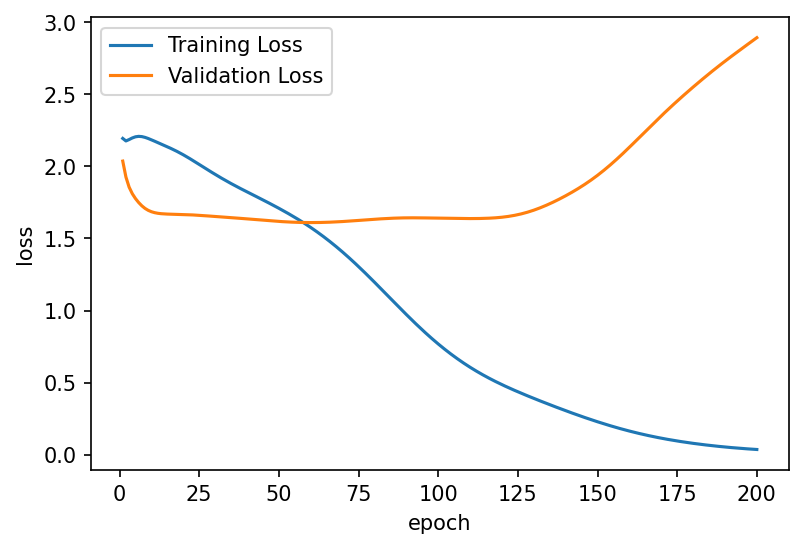

In [ ]:
t_range = torch.arange(1, 201)
fig = plt.figure(dpi=150)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(t_range, torch.FloatTensor(test_2b[1]).cpu(), label='Training Loss')
plt.plot(t_range, torch.FloatTensor(test_2b[3]).cpu(), label='Validation Loss')
plt.legend()
plt.show()

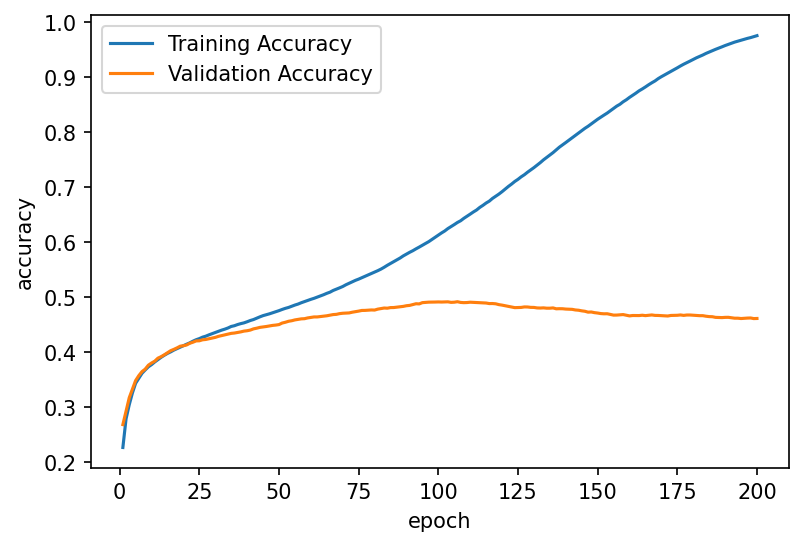

In [ ]:
t_range = torch.arange(1, 201)
fig = plt.figure(dpi=150)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(t_range, torch.FloatTensor(test_2b[0]).cpu(), label='Training Accuracy')
plt.plot(t_range, torch.FloatTensor(test_2b[2]).cpu(), label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
numel_list = [p.numel() for p in fc_model.parameters()]
sum(numel_list), numel_list

(3738506, [3145728, 1024, 524288, 512, 65536, 128, 1280, 10])